In [1]:
# Run the following command on your local computer to check the version of sklearn
import sklearn
!python --version
print(f"sklearn version: {sklearn.__version__}")

Python 3.9.15
sklearn version: 1.1.3


In [3]:
## Our standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
## Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
## Models & evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib
## setting random state for reproducibility
SEED = 321
np.random.seed(SEED)
## set pandas to display more columns
pd.set_option('display.max_columns',50)

In [5]:
## Load in the student performance - portuguese dataset & display the head and info
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vS6xDKNpWkBBdhZSqepy48bXo55QnRv1Xy6tXTKYzZLMPjZozMfYhHQjAcC8uj9hQ/pub?output=xlsx"
df = pd.read_excel(url,sheet_name='student-por')
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12


In [6]:
## Make x and y variables
y = df['G3'].copy()
X = df.drop(columns=['G3']).copy()
## train-test-split with random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=SEED)
X_train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
54,GP,F,15,U,LE3,A,3,3,other,other,other,mother,1,1,0,no,no,no,no,yes,yes,yes,no,5,3,4,4,4,1,0,13,12
208,GP,M,16,U,GT3,T,2,3,other,other,home,father,2,1,0,no,no,no,no,yes,yes,yes,no,5,3,3,1,1,3,0,13,12
23,GP,M,16,U,LE3,T,2,2,other,other,reputation,mother,2,2,0,no,yes,no,yes,yes,yes,yes,no,5,4,4,2,4,5,2,10,10
547,MS,M,16,R,LE3,T,4,1,other,at_home,other,father,1,1,0,no,no,no,no,yes,yes,yes,no,4,1,2,2,1,2,0,10,11
604,MS,F,18,U,GT3,T,1,1,at_home,services,course,mother,3,2,1,no,no,no,no,yes,no,no,no,4,4,2,1,2,2,2,9,10


In [7]:
## make categorical selector and verify it works 
cat_sel = make_column_selector(dtype_include='object')
cat_sel(X_train)

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [8]:
## make numeric selector and verify it works 
num_sel = make_column_selector(dtype_include='number')
num_sel(X_train)

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2']

In [9]:
## make pipelines for categorical vs numeric data
cat_pipe = make_pipeline(SimpleImputer(strategy='constant', fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False))
num_pipe = make_pipeline(SimpleImputer(strategy='mean'))

In [10]:
## make the preprocessing column transformer
preprocessor = make_column_transformer((num_pipe, num_sel),
                                       (cat_pipe,cat_sel),                                      
                                       verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x1511baee0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x1511ba9d0>)],
                  verbose_feature_names_out=False)

In [11]:
## fit column transformer and run get_feature_names_out
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
feature_names

array(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'school_GP', 'school_MS', 'sex_F', 'sex_M',
       'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3',
       'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_course', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_father', 'guardian_mother',
       'guardian_other', 'schoolsup_no', 'schoolsup_yes', 'famsup_no',
       'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no',
       'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes'], dtype=object)

In [12]:
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                           columns = feature_names, index = X_train.index)
X_train_df.head(3)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
54,15.0,3.0,3.0,1.0,1.0,0.0,5.0,3.0,4.0,4.0,4.0,1.0,0.0,13.0,12.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
208,16.0,2.0,3.0,2.0,1.0,0.0,5.0,3.0,3.0,1.0,1.0,3.0,0.0,13.0,12.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
23,16.0,2.0,2.0,2.0,2.0,0.0,5.0,4.0,4.0,2.0,4.0,5.0,2.0,10.0,10.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0


In [13]:
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                           columns = feature_names, index = X_test.index)
X_test_df.head(3)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
104,15.0,3.0,4.0,1.0,2.0,0.0,5.0,4.0,4.0,1.0,1.0,1.0,0.0,16.0,16.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
284,18.0,2.0,1.0,1.0,1.0,2.0,3.0,2.0,5.0,2.0,5.0,5.0,4.0,7.0,8.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
579,18.0,1.0,3.0,1.0,1.0,0.0,4.0,3.0,3.0,2.0,3.0,3.0,0.0,9.0,10.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0


In [14]:
## confirm the first 3 rows index in y_test matches X_test_df
y_test.head(3)

104    16
284     6
579     9
Name: G3, dtype: int64

In [15]:
def evaluate_regression(model, X_train,y_train, X_test, y_test): 
    """Evaluates a scikit learn regression model using r-squared and RMSE"""
    
    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train, 
                                            squared=False)
    
    print(f"Training Data:\tR^2= {r2_train:.2f}\tRMSE= {rmse_train:.2f}")
        
    
    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
                                            squared=False)
    
    print(f"Test Data:\tR^2= {r2_test:.2f}\tRMSE= {rmse_test:.2f}")

In [16]:
reg = RandomForestRegressor(random_state=SEED)
reg.fit(X_train_df,y_train)
evaluate_regression(reg, X_train_df, y_train, X_test_df, y_test)

Training Data:	R^2= 0.98	RMSE= 0.52
Test Data:	R^2= 0.83	RMSE= 1.26


In [17]:
reg.feature_importances_

array([9.06096804e-03, 4.27750617e-03, 3.98699965e-03, 7.00472751e-03,
       2.25626018e-03, 3.51399028e-03, 2.49268280e-03, 7.28098375e-03,
       5.16832208e-03, 7.96493073e-03, 3.65255869e-03, 3.45093237e-03,
       2.12456262e-02, 1.43357641e-02, 8.49691456e-01, 1.50552537e-03,
       1.34049006e-03, 8.01336123e-04, 2.00642049e-03, 9.16339891e-04,
       1.07877854e-03, 7.07605663e-04, 9.56989326e-04, 5.25321529e-04,
       3.57271546e-04, 7.24549353e-04, 4.69078763e-04, 1.72276703e-03,
       7.87754005e-04, 4.04612977e-03, 4.95701770e-04, 6.32101752e-04,
       2.02437914e-03, 2.64153718e-03, 2.88623322e-04, 1.66038340e-03,
       1.49827250e-03, 7.13793226e-03, 1.32903677e-03, 2.40072554e-03,
       1.19251978e-03, 6.59015769e-04, 1.29186344e-03, 1.17453508e-03,
       2.87137667e-03, 2.08767090e-03, 4.90905227e-04, 2.05326973e-04,
       6.07999604e-04, 6.08562065e-04, 1.09193794e-03, 1.09819114e-03,
       3.43745866e-04, 3.14073124e-04, 3.66951986e-04, 5.29971880e-04,
      

In [18]:
## Checking the number of feature importances matches the # of columns
print(len(reg.feature_importances_))
print(len(X_train_df.columns))
len(reg.feature_importances_) == len(X_train_df.columns)

58
58


True

In [19]:
## Saving the feature importances
importances = pd.Series(reg.feature_importances_, index= feature_names,
                       name='Feature Importance')
importances

age                  0.009061
Medu                 0.004278
Fedu                 0.003987
traveltime           0.007005
studytime            0.002256
failures             0.003514
famrel               0.002493
freetime             0.007281
goout                0.005168
Dalc                 0.007965
Walc                 0.003653
health               0.003451
absences             0.021246
G1                   0.014336
G2                   0.849691
school_GP            0.001506
school_MS            0.001340
sex_F                0.000801
sex_M                0.002006
address_R            0.000916
address_U            0.001079
famsize_GT3          0.000708
famsize_LE3          0.000957
Pstatus_A            0.000525
Pstatus_T            0.000357
Mjob_at_home         0.000725
Mjob_health          0.000469
Mjob_other           0.001723
Mjob_services        0.000788
Mjob_teacher         0.004046
Fjob_at_home         0.000496
Fjob_health          0.000632
Fjob_other           0.002024
Fjob_servi

In [20]:
importances.sum()

0.9999999999999999

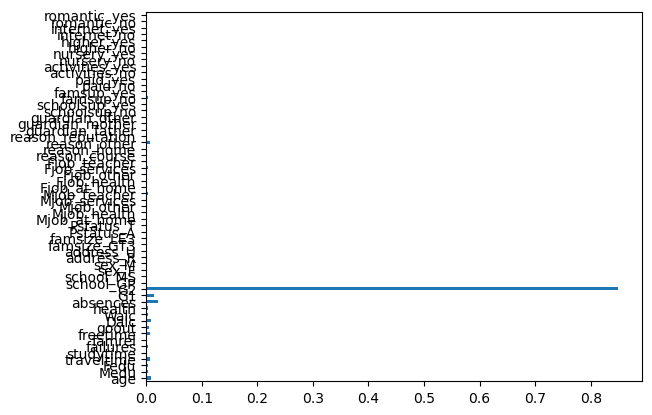

In [21]:
# plot importance
ax = importances.plot(kind='barh')

In [22]:
## Saving the feature importances sorted from largest to smallest (ascending=False)
sorted_importance = importances.sort_values(ascending=False)
sorted_importance

G2                   0.849691
absences             0.021246
G1                   0.014336
age                  0.009061
Dalc                 0.007965
freetime             0.007281
reason_other         0.007138
traveltime           0.007005
goout                0.005168
Medu                 0.004278
Mjob_teacher         0.004046
Fedu                 0.003987
Walc                 0.003653
failures             0.003514
health               0.003451
famsup_no            0.002871
Fjob_services        0.002642
famrel               0.002493
guardian_father      0.002401
studytime            0.002256
famsup_yes           0.002088
Fjob_other           0.002024
sex_M                0.002006
Mjob_other           0.001723
reason_course        0.001660
school_GP            0.001506
reason_home          0.001498
school_MS            0.001340
reason_reputation    0.001329
schoolsup_no         0.001292
guardian_mother      0.001193
schoolsup_yes        0.001175
nursery_yes          0.001098
nursery_no

<AxesSubplot: >

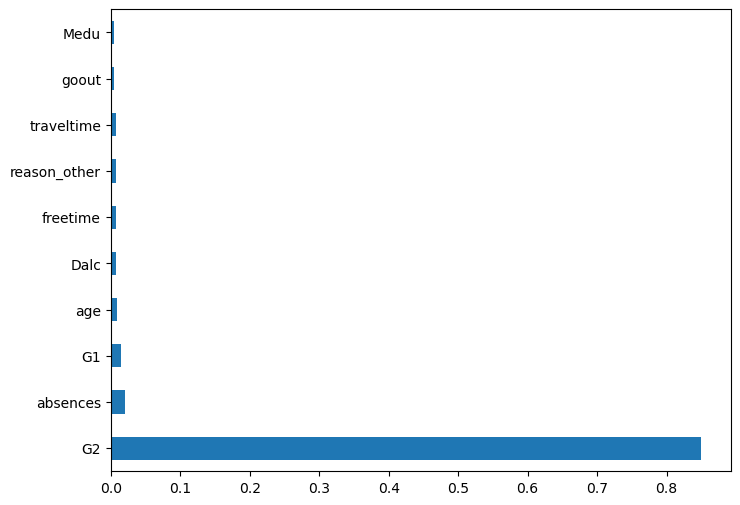

In [23]:
## just keep the top 10 importances and plot
sorted_importance.head(10).plot(kind='barh',
                                   figsize=(8,6))

In [24]:
## Saving the feature importances sorted from smallest to largest (ascending=True)
sorted_importance = importances.sort_values()
sorted_importance

paid_yes             0.000205
Fjob_teacher         0.000289
higher_yes           0.000314
higher_no            0.000344
Pstatus_T            0.000357
internet_no          0.000367
Mjob_health          0.000469
paid_no              0.000491
Fjob_at_home         0.000496
Pstatus_A            0.000525
internet_yes         0.000530
activities_no        0.000608
activities_yes       0.000609
Fjob_health          0.000632
guardian_other       0.000659
romantic_yes         0.000678
famsize_GT3          0.000708
Mjob_at_home         0.000725
Mjob_services        0.000788
sex_F                0.000801
address_R            0.000916
romantic_no          0.000948
famsize_LE3          0.000957
address_U            0.001079
nursery_no           0.001092
nursery_yes          0.001098
schoolsup_yes        0.001175
guardian_mother      0.001193
schoolsup_no         0.001292
reason_reputation    0.001329
school_MS            0.001340
reason_home          0.001498
school_GP            0.001506
reason_cou

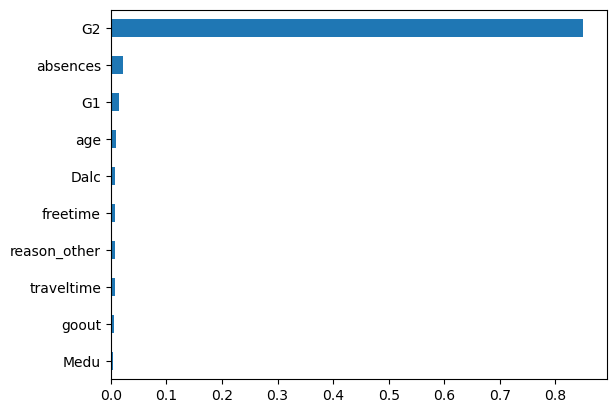

In [25]:
## just keep the top 10 importances and plot (that are now at the bottom of our series)
ax = sorted_importance.tail(10).plot(kind='barh')

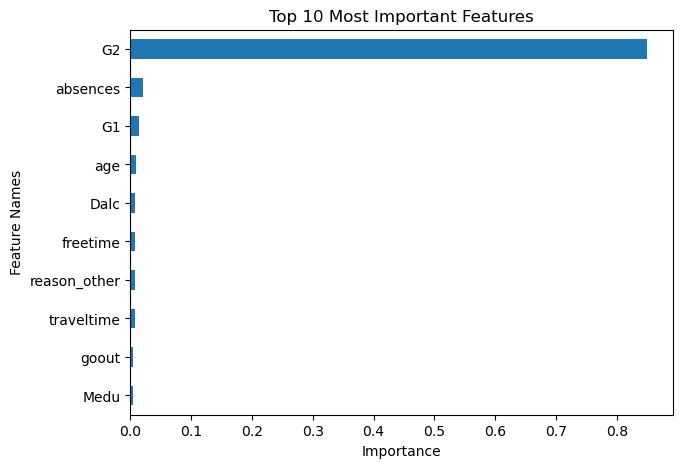

In [26]:
## plotting top 10 importances
ax = sorted_importance.tail(10).plot(kind='barh',
                                    figsize=(7,5),
                                      )
ax.set(xlabel='Importance',
        ylabel='Feature Names',
        title='Top 10 Most Important Features');

In [27]:
## displaying the Axis
ax

<AxesSubplot: title={'center': 'Top 10 Most Important Features'}, xlabel='Importance', ylabel='Feature Names'>

In [28]:
## using the ax to get the fig
fig_ax = ax.get_figure()

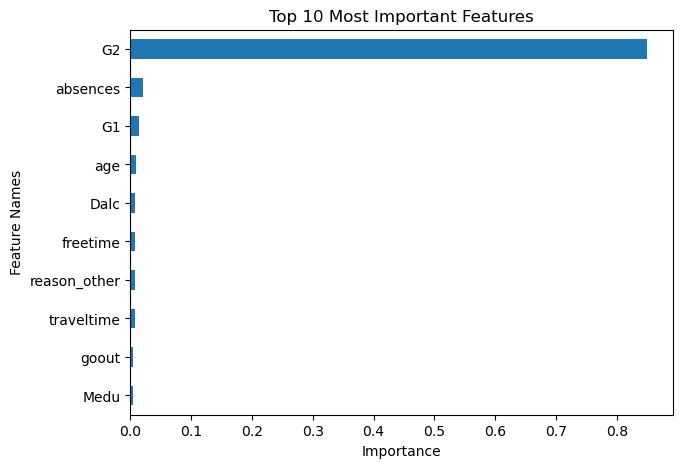

In [29]:
fig_ax

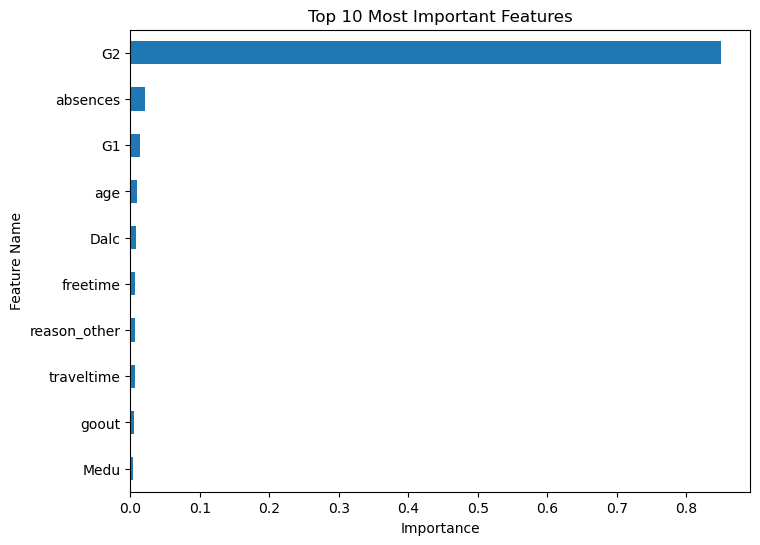

In [30]:
## Using plt.gcf to get the fig
ax = sorted_importance.tail(10).plot(kind='barh',
                                    figsize=(8,6), xlabel='Importance',
                                    ylabel='Feature Name', 
                                    title='Top 10 Most Important Features')
fig_gcf = plt.gcf()

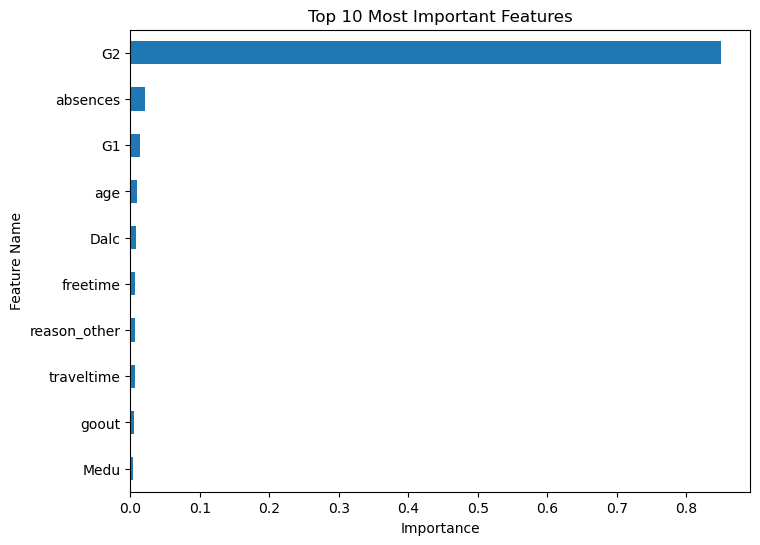

In [31]:
fig_gcf

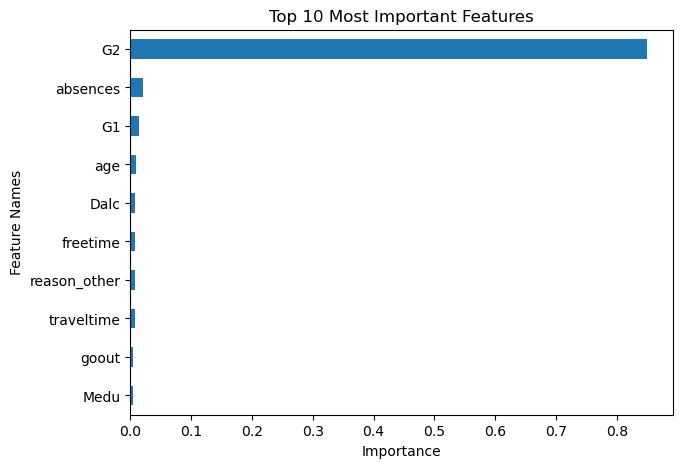

In [32]:
fig_ax

In [33]:
## extracting feature names from the model
reg.feature_names_in_

array(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'school_GP', 'school_MS', 'sex_F', 'sex_M',
       'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3',
       'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_course', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_father', 'guardian_mother',
       'guardian_other', 'schoolsup_no', 'schoolsup_yes', 'famsup_no',
       'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no',
       'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes'], dtype=object)

In [34]:
def get_importances(model, feature_names=None,name='Feature Importance',
                   sort=False, ascending=True):
    
    ## checking for feature names
    if feature_names == None:
        feature_names = model.feature_names_in_
        
    ## Saving the feature importances
    importances = pd.Series(model.feature_importances_, index= feature_names,
                           name=name)
    
    # sort importances
    if sort == True:
        importances = importances.sort_values(ascending=ascending)
        
    return importances

In [35]:
importances = get_importances(reg,sort=True,ascending=False)
importances

G2                   0.849691
absences             0.021246
G1                   0.014336
age                  0.009061
Dalc                 0.007965
freetime             0.007281
reason_other         0.007138
traveltime           0.007005
goout                0.005168
Medu                 0.004278
Mjob_teacher         0.004046
Fedu                 0.003987
Walc                 0.003653
failures             0.003514
health               0.003451
famsup_no            0.002871
Fjob_services        0.002642
famrel               0.002493
guardian_father      0.002401
studytime            0.002256
famsup_yes           0.002088
Fjob_other           0.002024
sex_M                0.002006
Mjob_other           0.001723
reason_course        0.001660
school_GP            0.001506
reason_home          0.001498
school_MS            0.001340
reason_reputation    0.001329
schoolsup_no         0.001292
guardian_mother      0.001193
schoolsup_yes        0.001175
nursery_yes          0.001098
nursery_no

In [36]:
def plot_importance(importances, top_n=None,  figsize=(8,6)):
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Importance',
            ylabel='Feature Names',
            title=title)
    ## return ax in case want to continue to update/modify figure
    return ax

<AxesSubplot: title={'center': 'All Features - Ranked by Importance'}, xlabel='Importance', ylabel='Feature Names'>

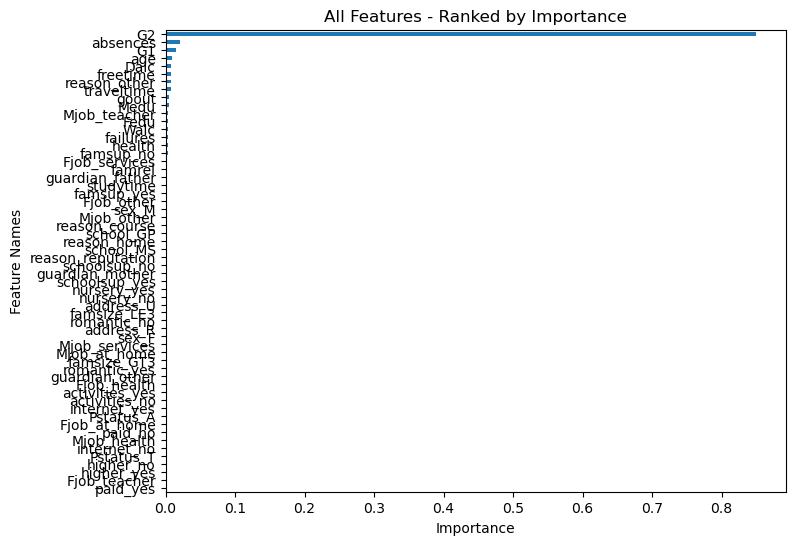

In [37]:
## testing our function
plot_importance(importances)

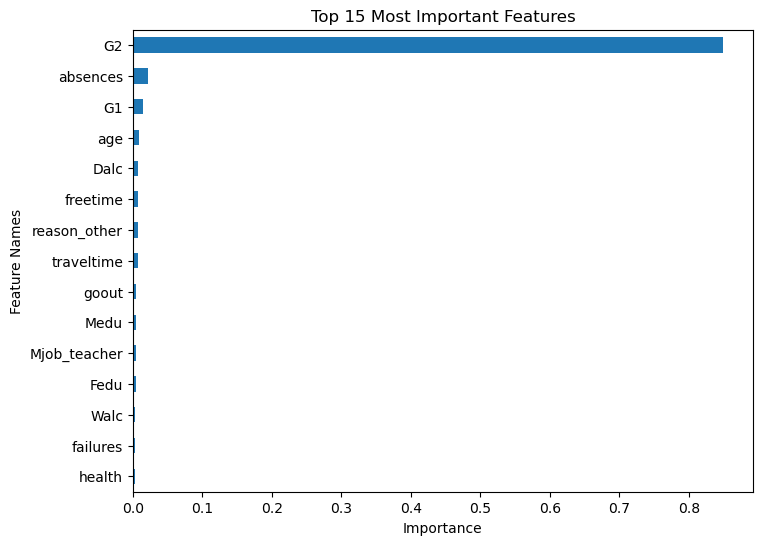

In [38]:
## testing our function
importances = get_importances(reg,sort=True,ascending=False,
                              name="RandomForest Importances")
plot_importance(importances,top_n=15);

## Remaking Our Model - Using Our Functions
Now that we have 3 helpful functions for evaluating our model and visualizing feature importance, let's remake our previous model one more time.
This time, we will call all 3 of our custom functions in the same cell as fitting our model.
Notice how efficient this code cell is!

Training Data:	R^2= 0.98	RMSE= 0.52
Test Data:	R^2= 0.83	RMSE= 1.26


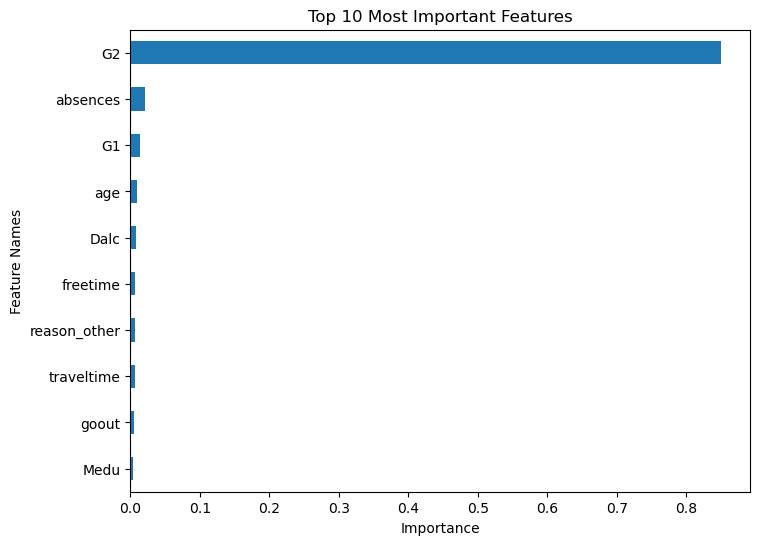

In [39]:
## fit random forest
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train_df,y_train)
evaluate_regression(reg, X_train_df, y_train, X_test_df,y_test)
## Saving the feature importances
importances = get_importances(reg)
plot_importance(importances, top_n=10);

In [40]:
importances.sort_values(ascending=False).head(4)


G2          0.849691
absences    0.021246
G1          0.014336
age         0.009061
Name: Feature Importance, dtype: float64

In [41]:
plot_train = pd.concat([X_train_df,y_train],axis=1)
plot_test = pd.concat([X_test_df,y_test],axis=1)
plot_df = pd.concat([plot_train, plot_test])
plot_df

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,G3
54,15.0,3.0,3.0,1.0,1.0,0.0,5.0,3.0,4.0,4.0,4.0,1.0,0.0,13.0,12.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,13
208,16.0,2.0,3.0,2.0,1.0,0.0,5.0,3.0,3.0,1.0,1.0,3.0,0.0,13.0,12.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,12
23,16.0,2.0,2.0,2.0,2.0,0.0,5.0,4.0,4.0,2.0,4.0,5.0,2.0,10.0,10.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,10
547,16.0,4.0,1.0,1.0,1.0,0.0,4.0,1.0,2.0,2.0,1.0,2.0,0.0,10.0,11.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,11
604,18.0,1.0,1.0,3.0,2.0,1.0,4.0,4.0,2.0,1.0,2.0,2.0,2.0,9.0,10.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,17.0,1.0,1.0,1.0,3.0,0.0,4.0,3.0,3.0,1.0,1.0,3.0,0.0,13.0,13.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,14
454,16.0,1.0,2.0,1.0,3.0,1.0,1.0,3.0,2.0,1.0,2.0,4.0,3.0,9.0,8.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,8
56,15.0,4.0,3.0,1.0,2.0,0.0,4.0,3.0,2.0,1.0,1.0,1.0,0.0,15.0,14.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,15
203,17.0,1.0,2.0,1.0,2.0,0.0,3.0,1.0,3.0,1.0,5.0,3.0,6.0,9.0,9.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,10


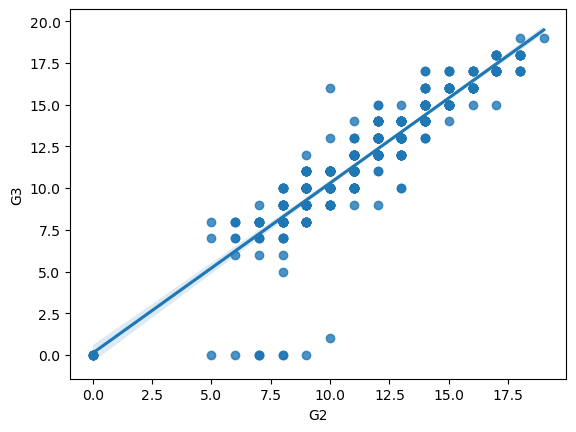

In [42]:
sns.regplot(data=plot_df, x='G2',y='G3');


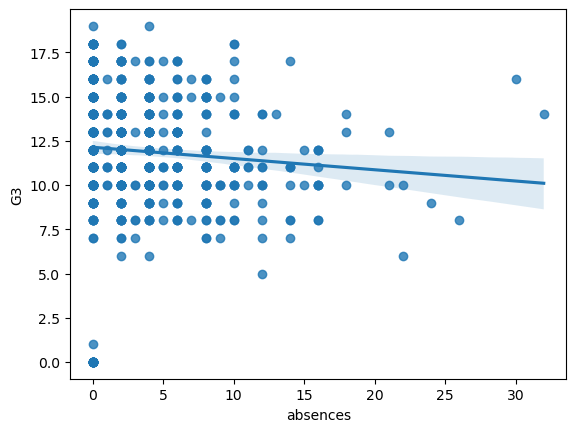

In [43]:
sns.regplot(data=plot_df, x='absences',y='G3');


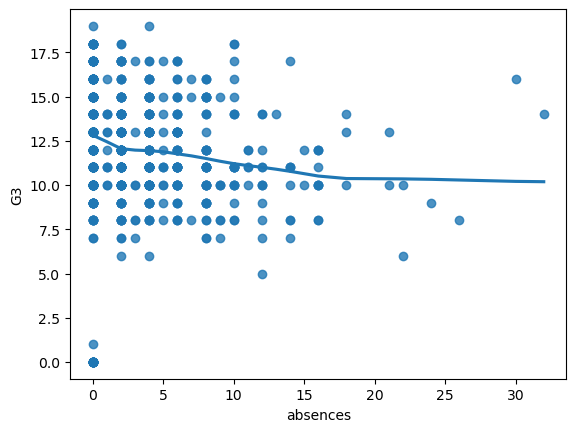

In [44]:
sns.regplot(data=plot_df, x='absences',y='G3', lowess=True);


<AxesSubplot: xlabel='G1', ylabel='G3'>

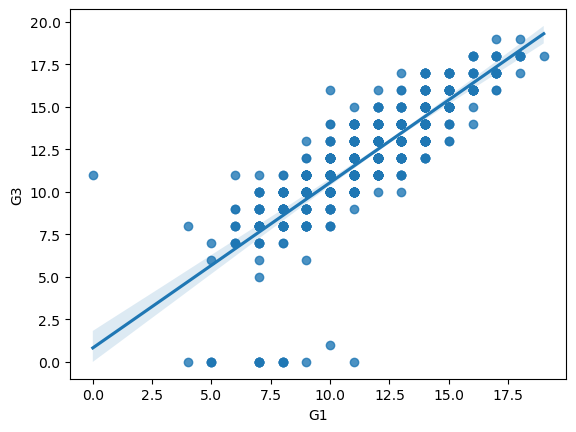

In [45]:
sns.regplot(data=plot_df, x='G1',y='G3')

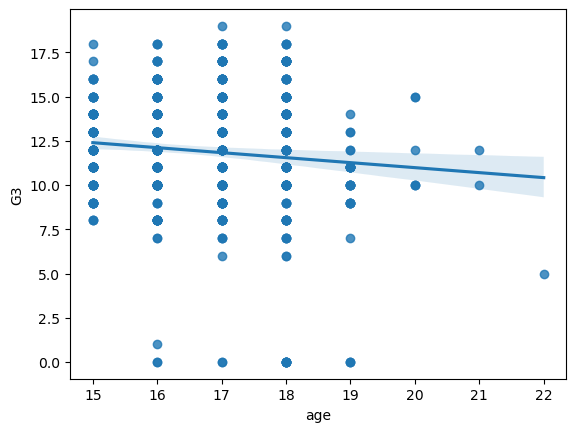

In [46]:
sns.regplot(data=plot_df, x='age',y='G3');

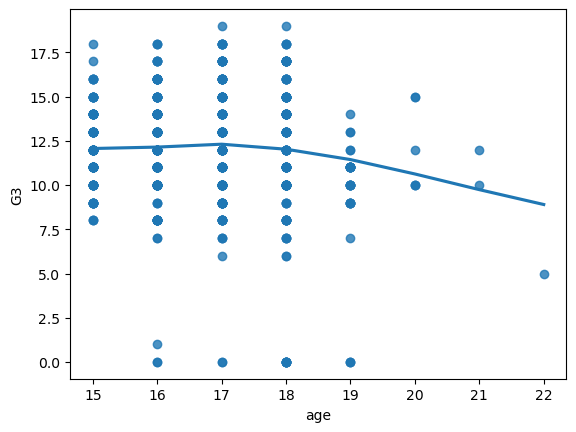

In [47]:
sns.regplot(data=plot_df, x='age',y='G3',lowess=True);


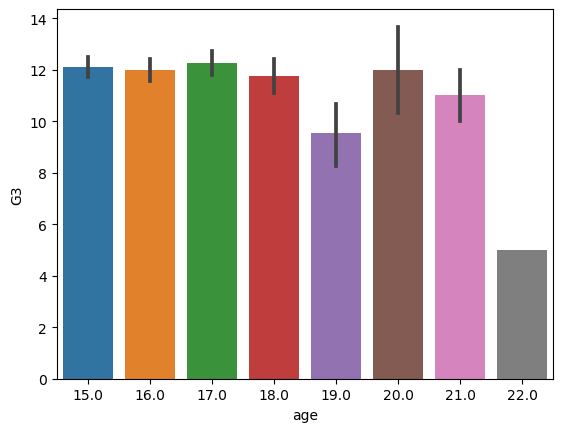

In [48]:
sns.barplot(data=plot_df, x='age',y='G3');

<AxesSubplot: xlabel='age', ylabel='G3'>

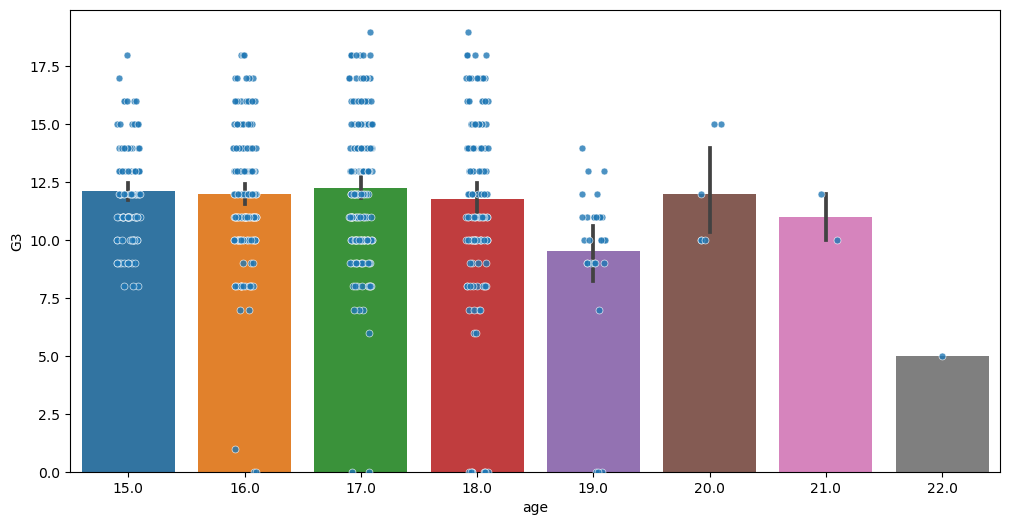

In [49]:
## adding a swarmplot to visualize each point
plt.figure(figsize=(12,6))
sns.stripplot(data=plot_df, x='age',y='G3',size=5,edgecolor='white',
              linewidth=0.5, alpha=.8);
sns.barplot(data=plot_df, x='age',y='G3')#,palette='dark');

In [50]:
example_tree =  reg.estimators_[0]
example_tree

DecisionTreeRegressor(max_features=1.0, random_state=1657633780)

In [51]:
DecisionTreeRegressor(max_features=1.0, random_state=1657633780)

DecisionTreeRegressor(max_features=1.0, random_state=1657633780)

In [52]:
evaluate_regression(example_tree,X_train_df, y_train, X_test_df,y_test)


Training Data:	R^2= 0.88	RMSE= 1.16
Test Data:	R^2= 0.71	RMSE= 1.62


/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [53]:
example_tree.get_depth()

12

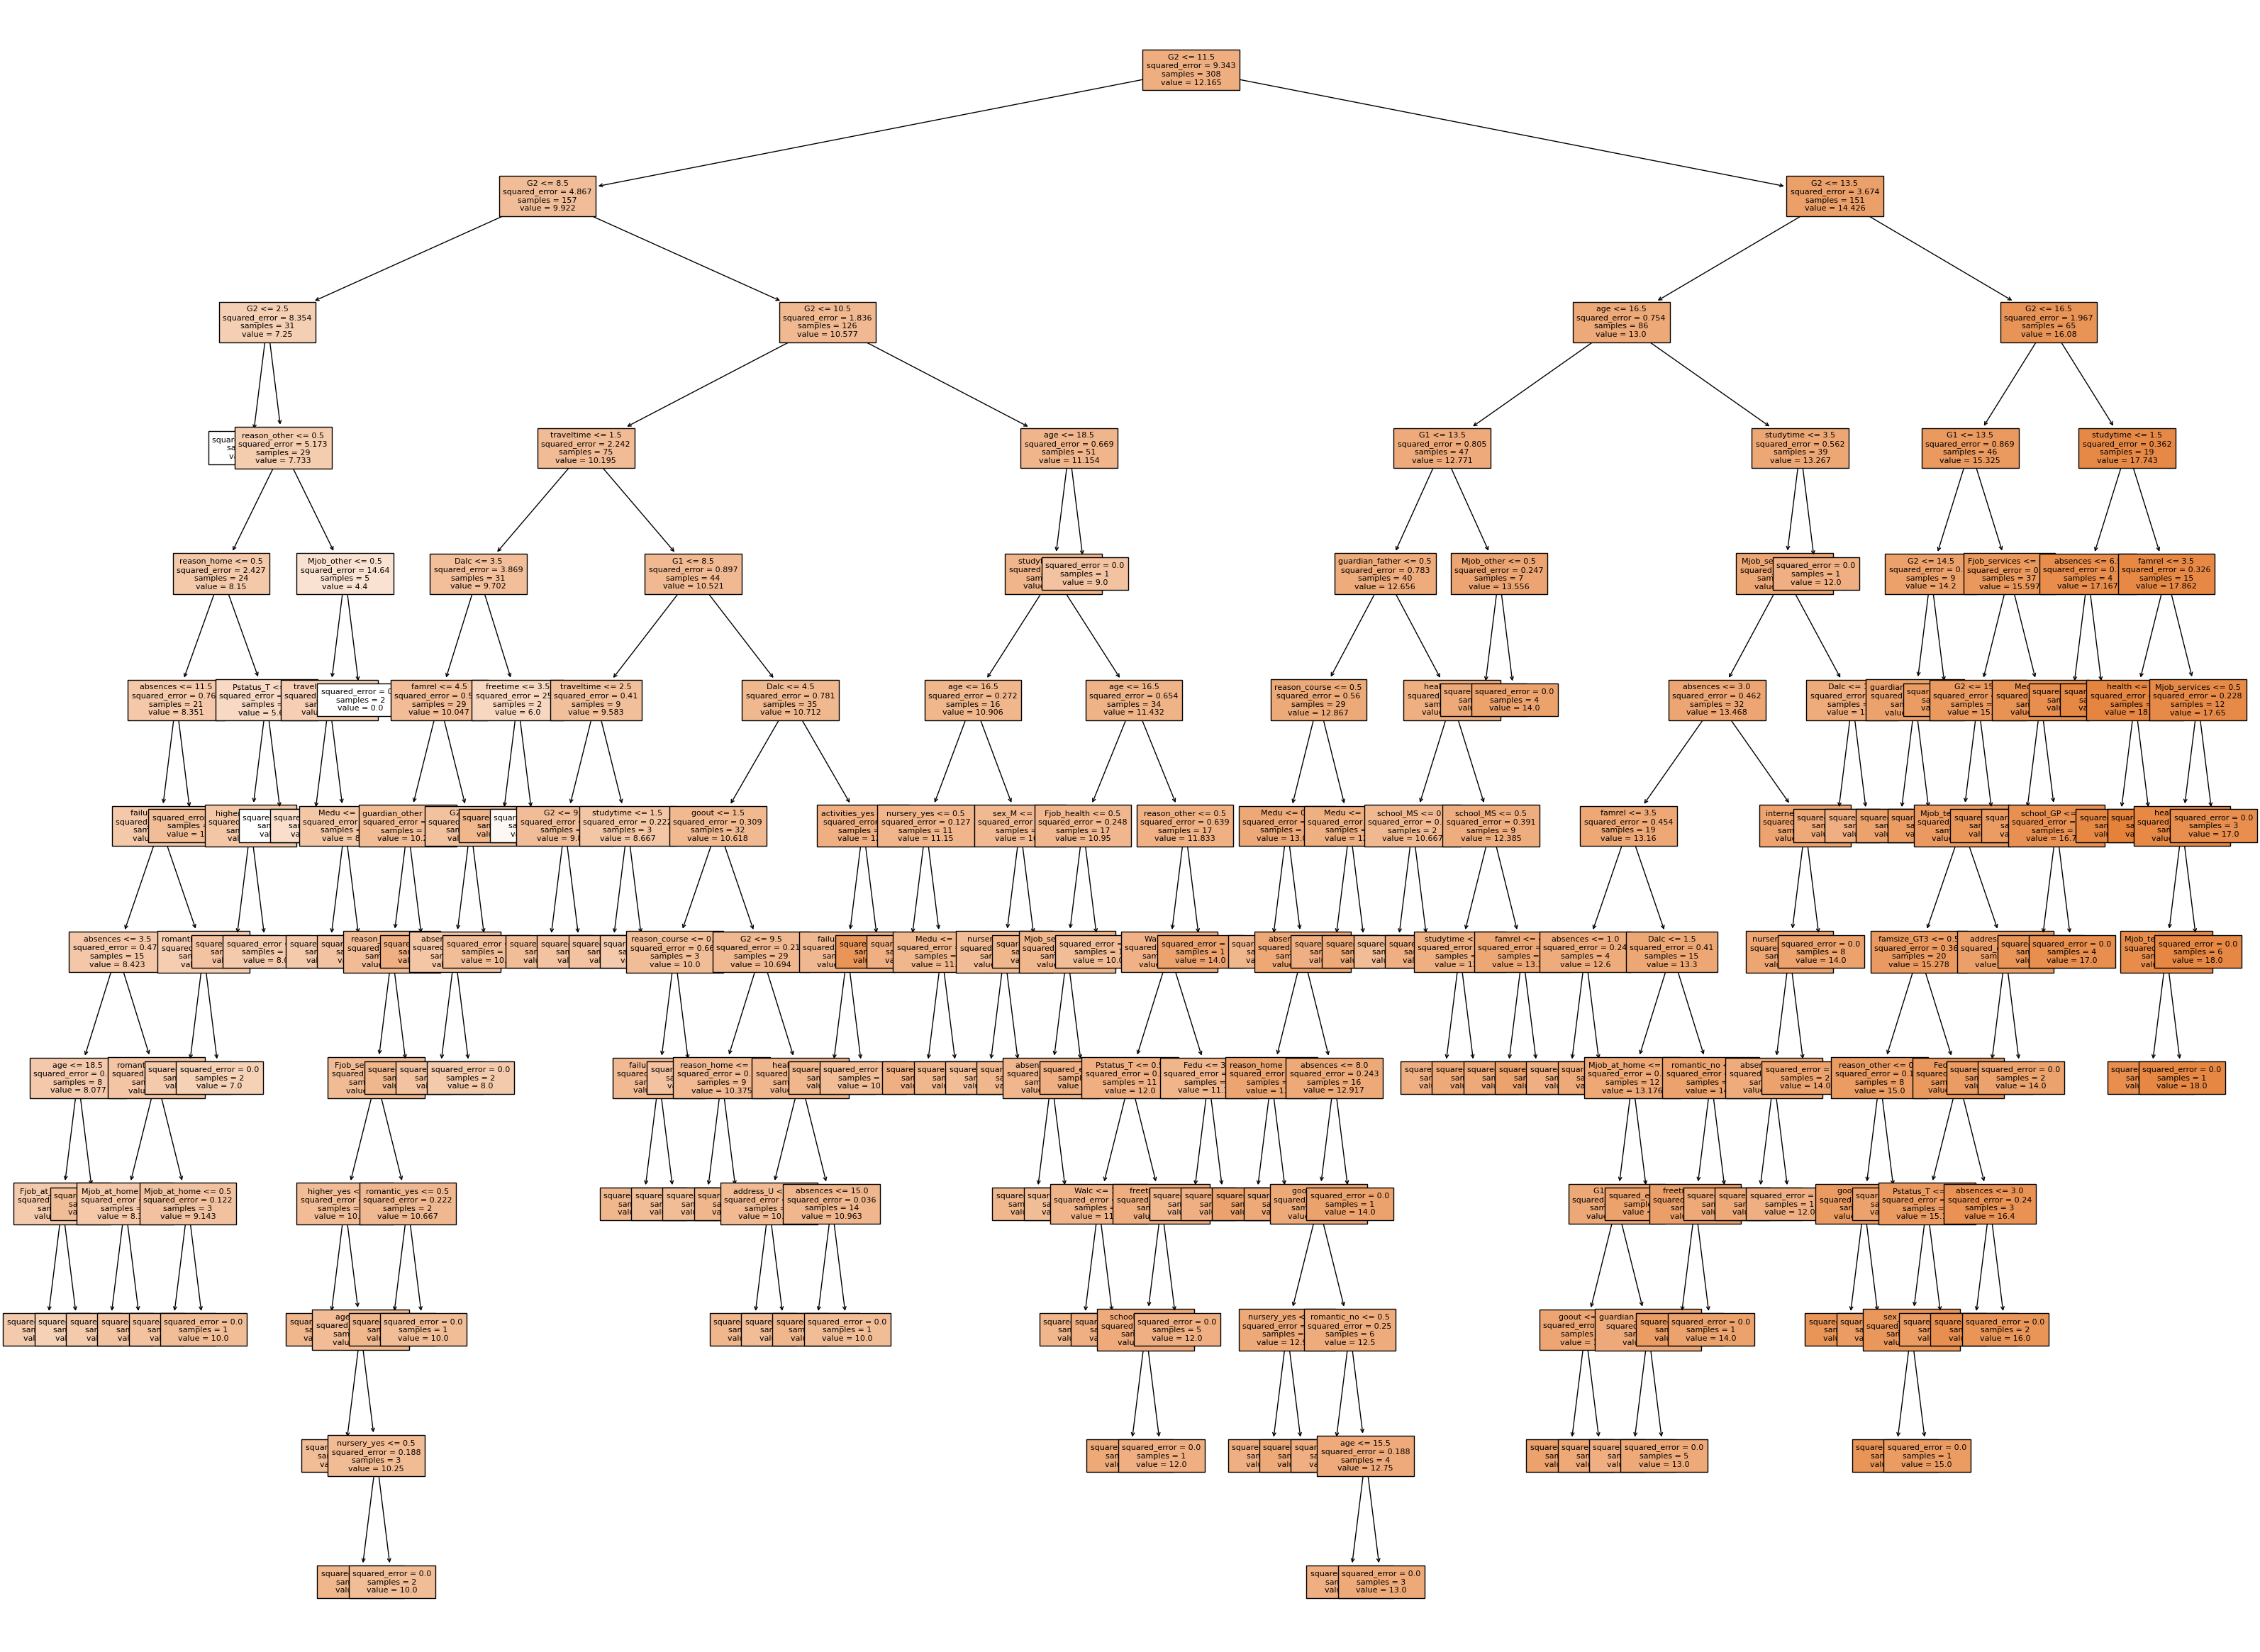

In [54]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(40,30))
plot_tree(example_tree, filled=True, feature_names=feature_names,ax=ax, fontsize=8);

In [55]:
fig.savefig('example_tree.png',dpi=300)


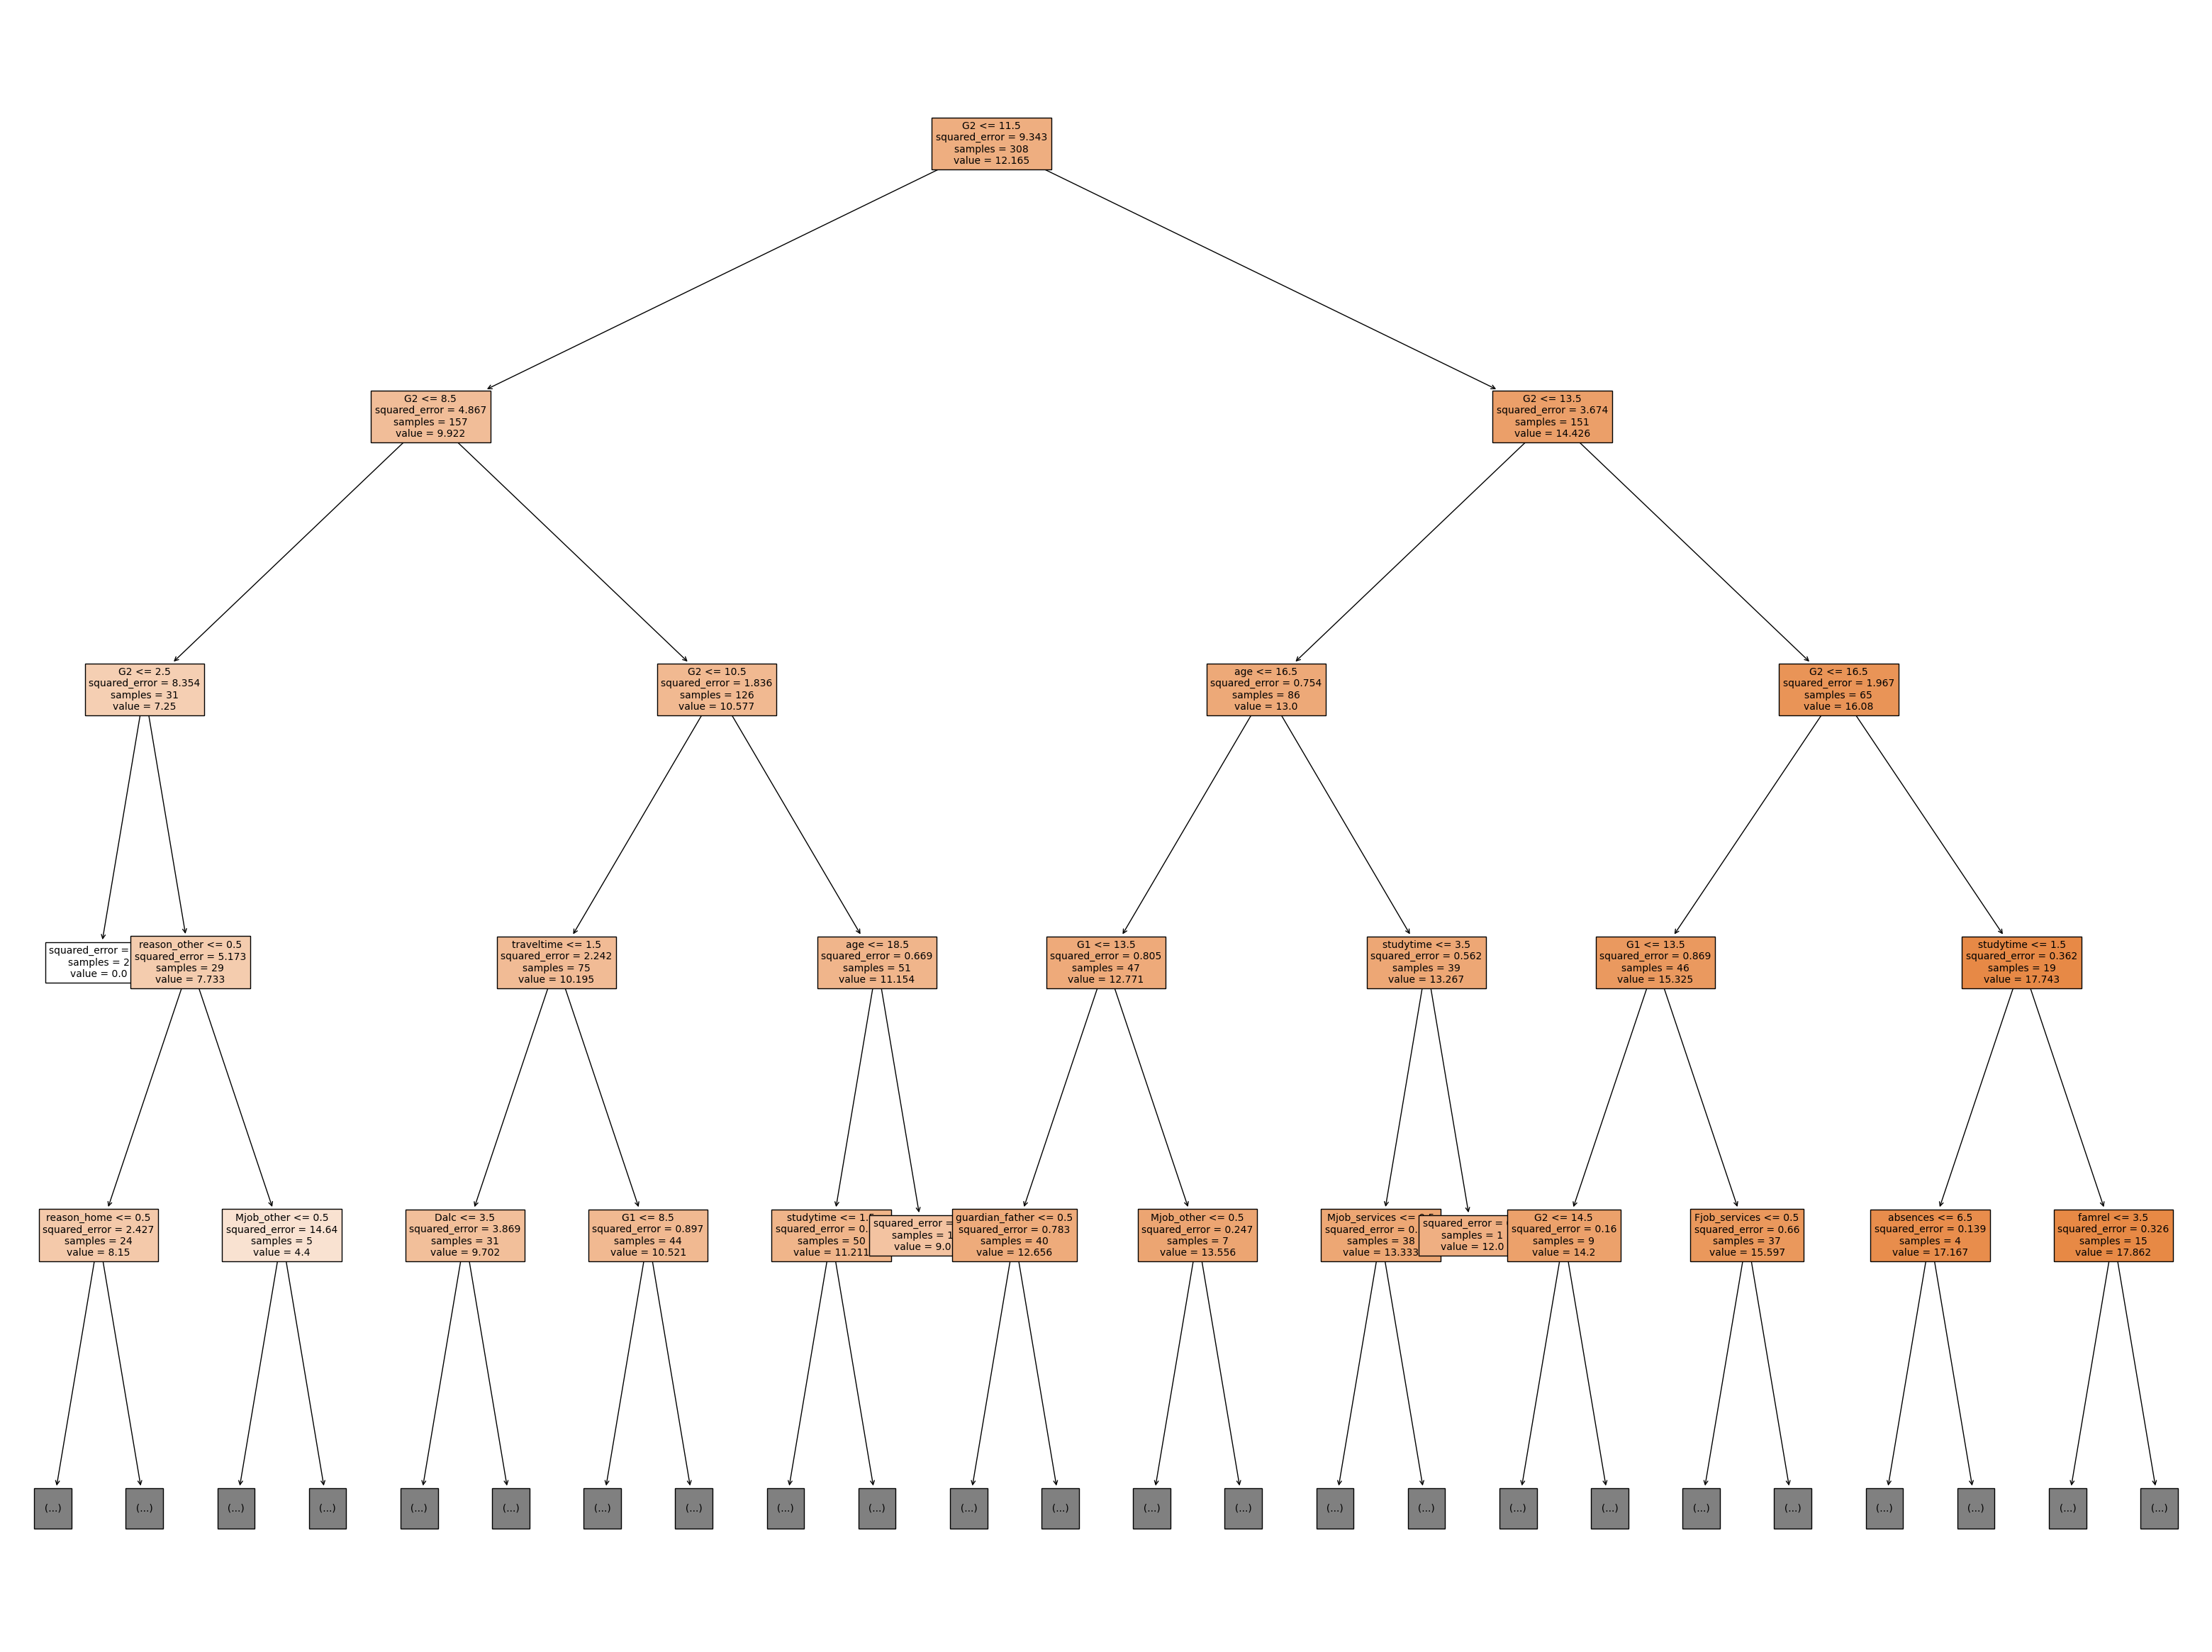

In [56]:
fig, ax = plt.subplots(figsize=(40,30))
plot_tree(example_tree, max_depth=4,filled=True,feature_names=feature_names,ax=ax,
         fontsize=10);

In [57]:
## Drop the G1 and G2 features from the x vars
drop_cols = ['G1','G2']
X_train_B = X_train_df.drop(columns=drop_cols)
X_test_B = X_test_df.drop(columns=drop_cols)
feature_names_B = X_train_B.columns
X_train_B.head(3)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,...,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
54,15.0,3.0,3.0,1.0,1.0,0.0,5.0,3.0,4.0,4.0,4.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
208,16.0,2.0,3.0,2.0,1.0,0.0,5.0,3.0,3.0,1.0,1.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
23,16.0,2.0,2.0,2.0,2.0,0.0,5.0,4.0,4.0,2.0,4.0,5.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0


Training Data:	R^2= 0.89	RMSE= 1.08
Test Data:	R^2= 0.35	RMSE= 2.44


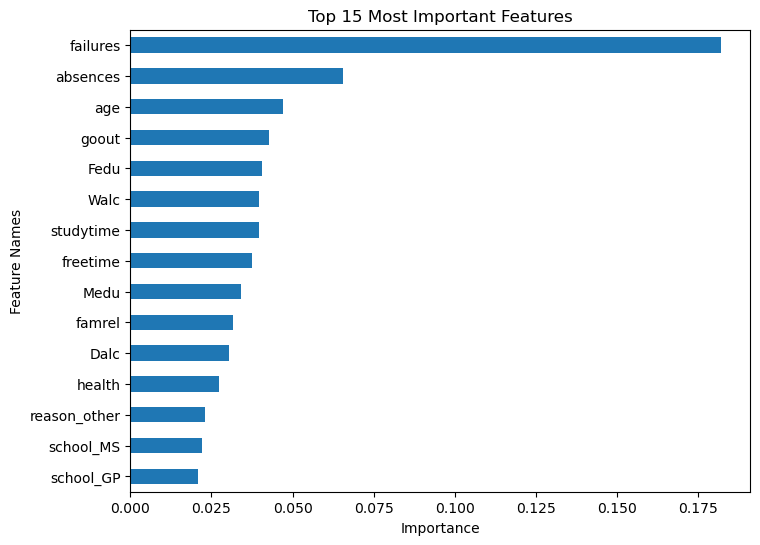

In [58]:
reg_B = RandomForestRegressor(random_state = SEED)
reg_B.fit(X_train_B, y_train)
evaluate_regression(reg_B, X_train_B, y_train, X_test_B,y_test)
## Saving the feature importances
importances = get_importances(reg_B, sort=True, ascending=False)
plot_importance(importances, top_n=15);

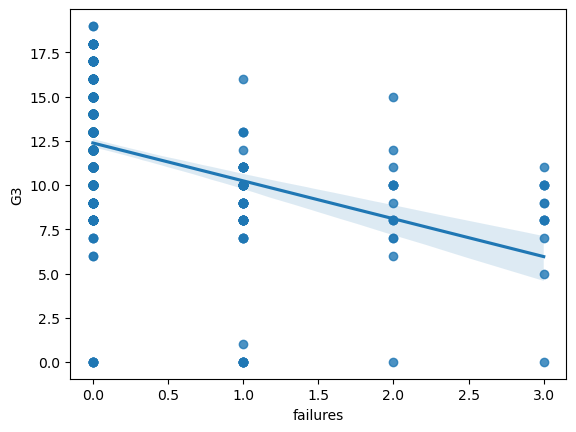

In [59]:
sns.regplot(data=plot_df, x='failures',y='G3');

## Permutation Importance


In [60]:
from sklearn.inspection import permutation_importance
## Permutation importance takes a fit model and the test data.
r = permutation_importance(reg_B, X_test_B, y_test,n_repeats =5)
r.keys()

dict_keys(['importances_mean', 'importances_std', 'importances'])

In [61]:
## can make the mean importances into a series
permutation_importances = pd.Series(r['importances_mean'],index=X_test_B.columns,
                           name = 'permutation importance')
permutation_importances = permutation_importances.sort_values(ascending=False)
permutation_importances

failures             0.330172
studytime            0.031402
Dalc                 0.023881
absences             0.023429
goout                0.021416
famrel               0.015072
higher_no            0.015048
age                  0.015023
health               0.013105
higher_yes           0.011662
Medu                 0.011127
freetime             0.008297
sex_M                0.007310
famsup_yes           0.007219
traveltime           0.006336
schoolsup_no         0.005420
Walc                 0.005100
sex_F                0.005009
reason_other         0.004736
famsup_no            0.004639
schoolsup_yes        0.004422
Mjob_health          0.003891
address_U            0.003136
activities_yes       0.002400
reason_course        0.002150
Pstatus_T            0.002044
Mjob_other           0.001917
romantic_no          0.001792
guardian_father      0.001506
guardian_mother      0.001448
Mjob_teacher         0.001425
address_R            0.000692
internet_no          0.000482
Mjob_servi

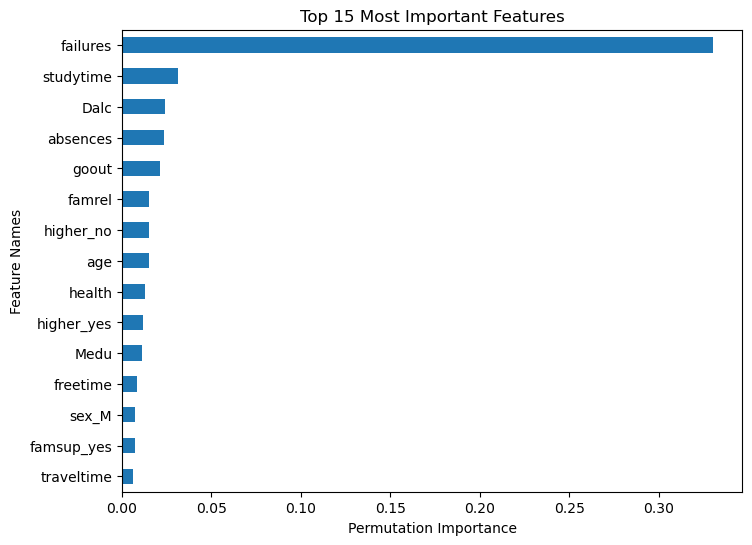

In [62]:
ax = plot_importance(permutation_importances,top_n=15)
ax.set(xlabel='Permutation Importance');

In [63]:
## color -coding top 5 bars
highlight_feats = importances.sort_values(ascending=True).tail(5).index
highlight_feats

Index(['Fedu', 'goout', 'age', 'absences', 'failures'], dtype='object')

In [64]:
## create a dictionary of each feature and its color
colors_dict = {}
for col in importances.index:
    if col in highlight_feats:
        colors_dict[col] = 'green'    
    else:
        colors_dict[col] = '#006ba4'
colors_dict

{'failures': 'green',
 'absences': 'green',
 'age': 'green',
 'goout': 'green',
 'Fedu': 'green',
 'Walc': '#006ba4',
 'studytime': '#006ba4',
 'freetime': '#006ba4',
 'Medu': '#006ba4',
 'famrel': '#006ba4',
 'Dalc': '#006ba4',
 'health': '#006ba4',
 'reason_other': '#006ba4',
 'school_MS': '#006ba4',
 'school_GP': '#006ba4',
 'traveltime': '#006ba4',
 'higher_no': '#006ba4',
 'Mjob_teacher': '#006ba4',
 'higher_yes': '#006ba4',
 'reason_home': '#006ba4',
 'schoolsup_no': '#006ba4',
 'reason_reputation': '#006ba4',
 'Fjob_teacher': '#006ba4',
 'schoolsup_yes': '#006ba4',
 'famsup_no': '#006ba4',
 'Fjob_services': '#006ba4',
 'Mjob_at_home': '#006ba4',
 'activities_yes': '#006ba4',
 'Mjob_other': '#006ba4',
 'reason_course': '#006ba4',
 'famsup_yes': '#006ba4',
 'Fjob_other': '#006ba4',
 'sex_M': '#006ba4',
 'activities_no': '#006ba4',
 'famsize_LE3': '#006ba4',
 'sex_F': '#006ba4',
 'Mjob_services': '#006ba4',
 'romantic_no': '#006ba4',
 'guardian_mother': '#006ba4',
 'nursery_yes': '

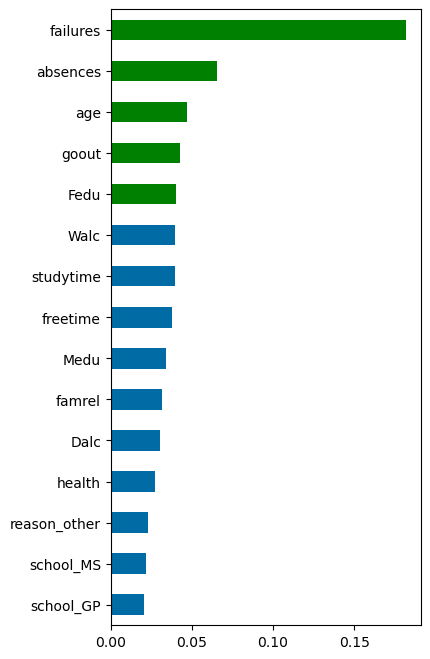

In [65]:
plot_vals = importances.sort_values().tail(15)
plot_vals.plot(kind='barh',color=plot_vals.index.map(colors_dict), figsize=(4,8));

In [66]:
def get_color_dict(importances, color_rest='#006ba4' , color_top='green',
                    top_n=7):
    ## color -coding top 5 bars
    highlight_feats = importances.sort_values(ascending=True).tail(top_n).index
    colors_dict = {col: color_top if col in highlight_feats else color_rest for col in importances.index}
    return colors_dict

In [67]:
colors_top7 = get_color_dict(importances, top_n=7)
colors_top7

{'failures': 'green',
 'absences': 'green',
 'age': 'green',
 'goout': 'green',
 'Fedu': 'green',
 'Walc': 'green',
 'studytime': 'green',
 'freetime': '#006ba4',
 'Medu': '#006ba4',
 'famrel': '#006ba4',
 'Dalc': '#006ba4',
 'health': '#006ba4',
 'reason_other': '#006ba4',
 'school_MS': '#006ba4',
 'school_GP': '#006ba4',
 'traveltime': '#006ba4',
 'higher_no': '#006ba4',
 'Mjob_teacher': '#006ba4',
 'higher_yes': '#006ba4',
 'reason_home': '#006ba4',
 'schoolsup_no': '#006ba4',
 'reason_reputation': '#006ba4',
 'Fjob_teacher': '#006ba4',
 'schoolsup_yes': '#006ba4',
 'famsup_no': '#006ba4',
 'Fjob_services': '#006ba4',
 'Mjob_at_home': '#006ba4',
 'activities_yes': '#006ba4',
 'Mjob_other': '#006ba4',
 'reason_course': '#006ba4',
 'famsup_yes': '#006ba4',
 'Fjob_other': '#006ba4',
 'sex_M': '#006ba4',
 'activities_no': '#006ba4',
 'famsize_LE3': '#006ba4',
 'sex_F': '#006ba4',
 'Mjob_services': '#006ba4',
 'romantic_no': '#006ba4',
 'guardian_mother': '#006ba4',
 'nursery_yes': '#006

In [68]:
def plot_importance_color(importances, top_n=None,  figsize=(8,6), 
                          color_dict=None):
    
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## create plot with colors, if provided
    if color_dict is not None:
        ## Getting color list and saving to plot_kws
        colors = plot_vals.index.map(color_dict)
        ax = plot_vals.plot(kind='barh', figsize=figsize, color=colors)
        
    else:
        ## create plot without colors, if not provided
        ax = plot_vals.plot(kind='barh', figsize=figsize)
        
    # set titles and axis labels
    ax.set(xlabel='Importance', 
           ylabel='Feature Names', 
           title=title)
    
    ## return ax in case want to continue to update/modify figure
    return ax

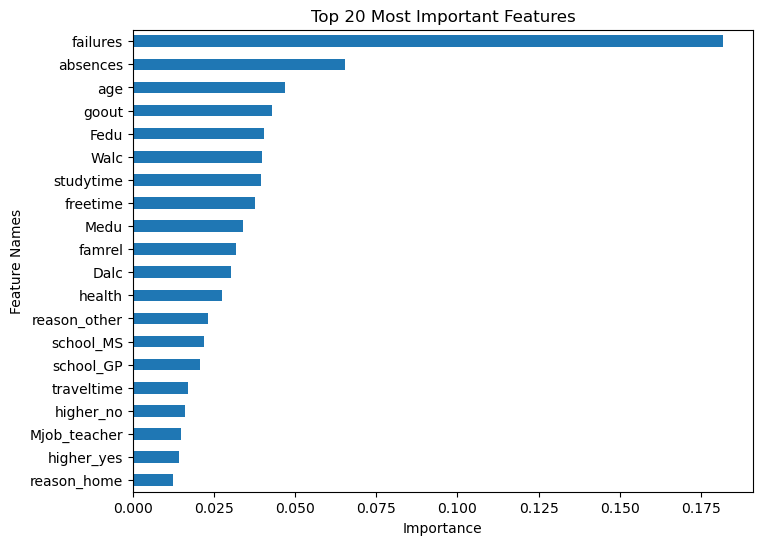

In [69]:
plot_importance_color(importances, color_dict=None,top_n=20);

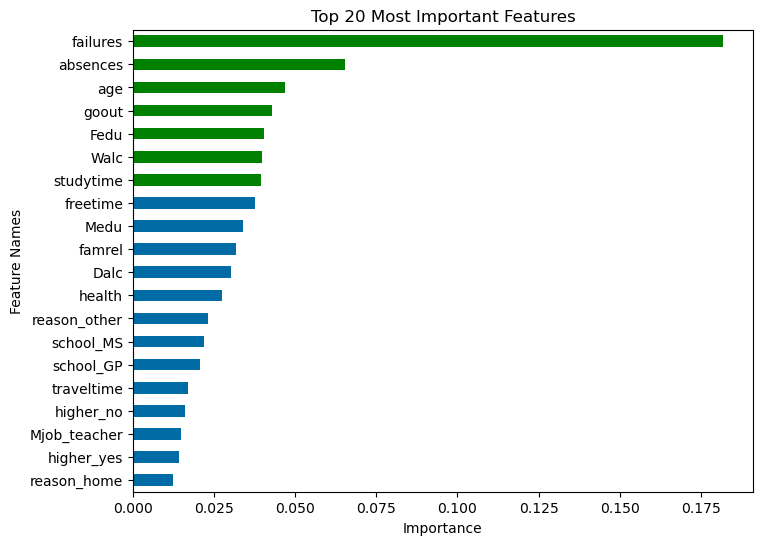

In [70]:
plot_importance_color(importances, color_dict=colors_top7,top_n=20);


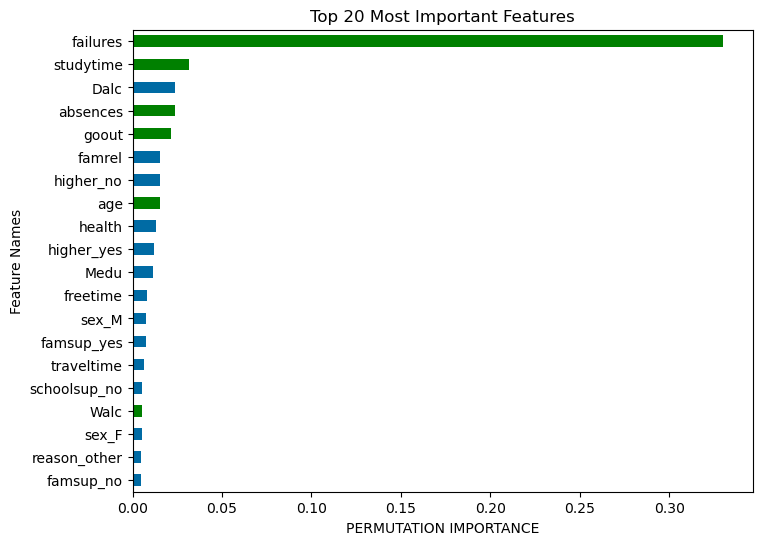

In [71]:
ax = plot_importance_color(permutation_importances,color_dict=colors_top7,top_n=20);
ax.set_xlabel("PERMUTATION IMPORTANCE");

In [72]:
def plot_importance_color_ax(importances, top_n=None,  figsize=(8,6), 
                          color_dict=None, ax=None):
    
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## create plot with colors, if provided
    if color_dict is not None:
        ## Getting color list and saving to plot_kws
        colors = plot_vals.index.map(color_dict)
        ax = plot_vals.plot(kind='barh', figsize=figsize, color=colors, ax=ax)
        
    else:
        ## create plot without colors, if not provided
        ax = plot_vals.plot(kind='barh', figsize=figsize, ax=ax)
        
    # set titles and axis labels
    ax.set(xlabel='Importance', 
           ylabel='Feature Names', 
           title=title)
    
    ## return ax in case want to continue to update/modify figure
    return ax

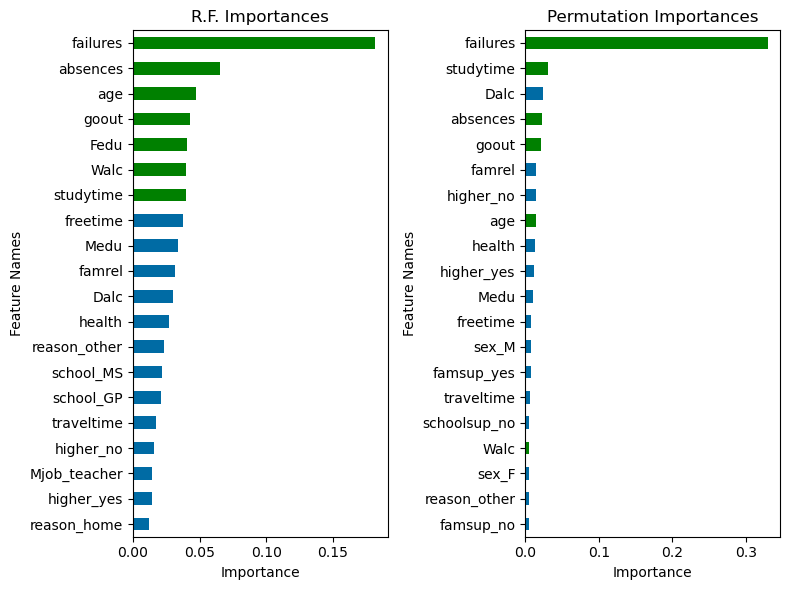

In [73]:
fig, axes = plt.subplots(ncols=2, figsize=(20,8))
n = 20 # setting the # of features to use for both subplots
plot_importance_color_ax(importances, top_n=n, ax=axes[0],
                         color_dict= colors_top7)
plot_importance_color_ax(permutation_importances, top_n=n, ax=axes[1],
                         color_dict=colors_top7)
axes[0].set(title='R.F. Importances')
axes[1].set(title='Permutation Importances')
fig.tight_layout()

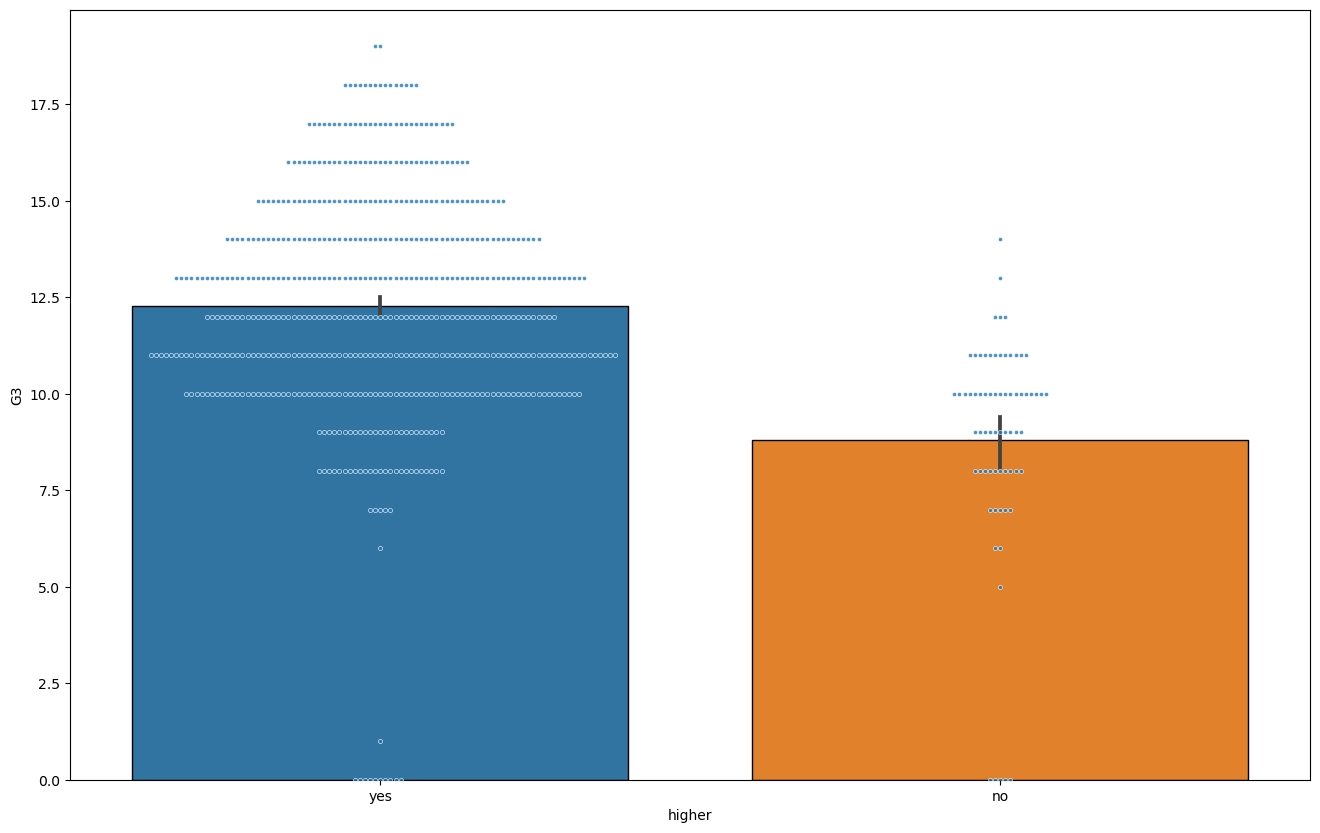

In [74]:
plt.figure(figsize=(16,10))
sns.swarmplot(data=df, x='higher',y='G3',size=3,edgecolor='white',
              linewidth=0.5, alpha=.8);
sns.barplot(data=df, x='higher',y='G3',edgecolor='black',
            linewidth=1);

## Linear Regression Coefficients - Revisited


In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
## fitting a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_B, y_train)
evaluate_regression(lin_reg, X_train_B, y_train, X_test_B,y_test)

Training Data:	R^2= 0.35	RMSE= 2.65
Test Data:	R^2= 0.35	RMSE= 2.44


In [77]:
lin_reg.coef_


array([ 1.77966415e-01,  8.74702545e-02,  2.12445435e-01,  2.50534869e-01,
        4.62252594e-01, -1.29649656e+00,  1.56900627e-01, -2.33788183e-01,
        4.79724941e-03, -2.15548545e-01, -6.97098863e-02, -1.24001532e-01,
       -2.91101717e-02, -4.85414952e+09, -4.85414952e+09,  4.25548358e+11,
        4.25548358e+11, -1.82853001e+11, -1.82853001e+11,  1.26259092e+11,
        1.26259092e+11, -1.13111745e+12, -1.13111745e+12, -6.20944479e+11,
       -6.20944479e+11, -6.20944479e+11, -6.20944479e+11, -6.20944479e+11,
        1.58601242e+11,  1.58601242e+11,  1.58601242e+11,  1.58601242e+11,
        1.58601242e+11, -1.74717849e+12, -1.74717849e+12, -1.74717849e+12,
       -1.74717849e+12, -6.88143283e+12, -6.88143283e+12, -6.88143283e+12,
       -1.20439922e+12, -1.20439922e+12,  2.50700364e+12,  2.50700364e+12,
        7.09168062e+11,  7.09168062e+11,  2.34209128e+11,  2.34209128e+11,
        2.96577352e+12,  2.96577352e+12,  2.61351845e+11,  2.61351845e+11,
        1.68188060e+11,  

In [78]:
## Checking the number of coeffs matches the # of feature names
print(len(lin_reg.coef_))
len(feature_names_B)

56


56

In [79]:
## Saving the coefficients
coeffs = pd.Series(lin_reg.coef_, index= feature_names_B)
coeffs

age                  1.779664e-01
Medu                 8.747025e-02
Fedu                 2.124454e-01
traveltime           2.505349e-01
studytime            4.622526e-01
failures            -1.296497e+00
famrel               1.569006e-01
freetime            -2.337882e-01
goout                4.797249e-03
Dalc                -2.155485e-01
Walc                -6.970989e-02
health              -1.240015e-01
absences            -2.911017e-02
school_GP           -4.854150e+09
school_MS           -4.854150e+09
sex_F                4.255484e+11
sex_M                4.255484e+11
address_R           -1.828530e+11
address_U           -1.828530e+11
famsize_GT3          1.262591e+11
famsize_LE3          1.262591e+11
Pstatus_A           -1.131117e+12
Pstatus_T           -1.131117e+12
Mjob_at_home        -6.209445e+11
Mjob_health         -6.209445e+11
Mjob_other          -6.209445e+11
Mjob_services       -6.209445e+11
Mjob_teacher        -6.209445e+11
Fjob_at_home         1.586012e+11
Fjob_health   

In [80]:
# use .loc to add the intercept to the series
coeffs.loc['intercept'] = lin_reg.intercept_
coeffs

age                  1.779664e-01
Medu                 8.747025e-02
Fedu                 2.124454e-01
traveltime           2.505349e-01
studytime            4.622526e-01
failures            -1.296497e+00
famrel               1.569006e-01
freetime            -2.337882e-01
goout                4.797249e-03
Dalc                -2.155485e-01
Walc                -6.970989e-02
health              -1.240015e-01
absences            -2.911017e-02
school_GP           -4.854150e+09
school_MS           -4.854150e+09
sex_F                4.255484e+11
sex_M                4.255484e+11
address_R           -1.828530e+11
address_U           -1.828530e+11
famsize_GT3          1.262591e+11
famsize_LE3          1.262591e+11
Pstatus_A           -1.131117e+12
Pstatus_T           -1.131117e+12
Mjob_at_home        -6.209445e+11
Mjob_health         -6.209445e+11
Mjob_other          -6.209445e+11
Mjob_services       -6.209445e+11
Mjob_teacher        -6.209445e+11
Fjob_at_home         1.586012e+11
Fjob_health   

In [81]:
pd.set_option('display.float_format', lambda x: f"{x:,.2f}")
coeffs

age                                  0.18
Medu                                 0.09
Fedu                                 0.21
traveltime                           0.25
studytime                            0.46
failures                            -1.30
famrel                               0.16
freetime                            -0.23
goout                                0.00
Dalc                                -0.22
Walc                                -0.07
health                              -0.12
absences                            -0.03
school_GP               -4,854,149,517.59
school_MS               -4,854,149,519.05
sex_F                  425,548,358,215.74
sex_M                  425,548,358,215.08
address_R             -182,853,000,636.80
address_U             -182,853,000,636.57
famsize_GT3            126,259,092,341.96
famsize_LE3            126,259,092,342.46
Pstatus_A           -1,131,117,445,442.30
Pstatus_T           -1,131,117,445,442.02
Mjob_at_home          -620,944,479

In [82]:
## Make x and y variables
y = df['G3'].copy()
X = df.drop(columns=['G1', 'G2', 'G3']).copy()
## train-test-split with random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=SEED)
X_train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
54,GP,F,15,U,LE3,A,3,3,other,other,other,mother,1,1,0,no,no,no,no,yes,yes,yes,no,5,3,4,4,4,1,0
208,GP,M,16,U,GT3,T,2,3,other,other,home,father,2,1,0,no,no,no,no,yes,yes,yes,no,5,3,3,1,1,3,0
23,GP,M,16,U,LE3,T,2,2,other,other,reputation,mother,2,2,0,no,yes,no,yes,yes,yes,yes,no,5,4,4,2,4,5,2
547,MS,M,16,R,LE3,T,4,1,other,at_home,other,father,1,1,0,no,no,no,no,yes,yes,yes,no,4,1,2,2,1,2,0
604,MS,F,18,U,GT3,T,1,1,at_home,services,course,mother,3,2,1,no,no,no,no,yes,no,no,no,4,4,2,1,2,2,2


In [83]:
## make pipelines for categorical vs numeric data
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(drop='if_binary', sparse=False))
num_pipe = make_pipeline(SimpleImputer(strategy='mean'))
## make the preprocessing column transformer
preprocessor = make_column_transformer((num_pipe, num_sel),
                                       (cat_pipe,cat_sel),
                                      verbose_feature_names_out=False)
## fit column transformer and run get_feature_names_out
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
X_train_df = pd.DataFrame(preprocessor.transform(X_train), 
                          columns = feature_names, index = X_train.index)
X_test_df = pd.DataFrame(preprocessor.transform(X_test), 
                          columns = feature_names, index = X_test.index)
X_test_df.head(3)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
104,15.00,3.00,4.00,1.00,2.00,0.00,5.00,4.00,4.00,1.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,0.00
284,18.00,2.00,1.00,1.00,1.00,2.00,3.00,2.00,5.00,2.00,5.00,5.00,4.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
579,18.00,1.00,3.00,1.00,1.00,0.00,4.00,3.00,3.00,2.00,3.00,3.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00


In [84]:
## fitting a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_df, y_train)
evaluate_regression(lin_reg, X_train_df, y_train, X_test_df,y_test)

Training Data:	R^2= 0.35	RMSE= 2.65
Test Data:	R^2= 0.35	RMSE= 2.45


In [85]:
## Saving the coefficients
coeffs = pd.Series(lin_reg.coef_, index= feature_names)
coeffs['intercept'] = lin_reg.intercept_
coeffs

age                                  0.18
Medu                                 0.09
Fedu                                 0.21
traveltime                           0.25
studytime                            0.46
failures                            -1.29
famrel                               0.16
freetime                            -0.23
goout                                0.01
Dalc                                -0.21
Walc                                -0.07
health                              -0.12
absences                            -0.03
school_MS                           -1.46
sex_M                               -0.66
address_U                            0.23
famsize_LE3                          0.49
Pstatus_T                            0.27
Mjob_at_home        -2,159,222,900,510.34
Mjob_health         -2,159,222,900,509.42
Mjob_other          -2,159,222,900,510.25
Mjob_services       -2,159,222,900,509.99
Mjob_teacher        -2,159,222,900,510.10
Fjob_at_home          -820,854,687

In [86]:
## Make x and y variables
y = df['G3'].copy()
X = df.drop(columns=['G1', 'G2', 'G3']).copy()
## train-test-split with random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=SEED)
X_train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
54,GP,F,15,U,LE3,A,3,3,other,other,other,mother,1,1,0,no,no,no,no,yes,yes,yes,no,5,3,4,4,4,1,0
208,GP,M,16,U,GT3,T,2,3,other,other,home,father,2,1,0,no,no,no,no,yes,yes,yes,no,5,3,3,1,1,3,0
23,GP,M,16,U,LE3,T,2,2,other,other,reputation,mother,2,2,0,no,yes,no,yes,yes,yes,yes,no,5,4,4,2,4,5,2
547,MS,M,16,R,LE3,T,4,1,other,at_home,other,father,1,1,0,no,no,no,no,yes,yes,yes,no,4,1,2,2,1,2,0
604,MS,F,18,U,GT3,T,1,1,at_home,services,course,mother,3,2,1,no,no,no,no,yes,no,no,no,4,4,2,1,2,2,2


In [87]:
## make pipelines for categorical vs numeric data
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(drop='first', sparse=False))
num_pipe = make_pipeline(SimpleImputer(strategy='mean'))
## make the preprocessing column transformer
preprocessor = make_column_transformer((num_pipe, num_sel),
                                       (cat_pipe,cat_sel),
                                      verbose_feature_names_out=False)
## fit column transformer and run get_feature_names_out
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                           columns = feature_names, index = X_train.index)
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                           columns = feature_names, index = X_test.index)
X_test_df.head(3)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
104,15.00,3.00,4.00,1.00,2.00,0.00,5.00,4.00,4.00,1.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,0.00
284,18.00,2.00,1.00,1.00,1.00,2.00,3.00,2.00,5.00,2.00,5.00,5.00,4.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
579,18.00,1.00,3.00,1.00,1.00,0.00,4.00,3.00,3.00,2.00,3.00,3.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00


In [88]:
## fitting a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_df, y_train)
evaluate_regression(lin_reg, X_train_df, y_train, X_test_df,y_test)

Training Data:	R^2= 0.35	RMSE= 2.65
Test Data:	R^2= 0.35	RMSE= 2.45


In [89]:
# Tip: sklearn models now store the feature names in .feature_names_in_!
lin_reg.feature_names_in_

array(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'school_MS', 'sex_M', 'address_U', 'famsize_LE3',
       'Pstatus_T', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'reason_home', 'reason_other', 'reason_reputation',
       'guardian_mother', 'guardian_other', 'schoolsup_yes', 'famsup_yes',
       'paid_yes', 'activities_yes', 'nursery_yes', 'higher_yes',
       'internet_yes', 'romantic_yes'], dtype=object)

In [90]:
## Saving the coefficients
coeffs = pd.Series(lin_reg.coef_, index= lin_reg.feature_names_in_)
coeffs['intercept'] = lin_reg.intercept_
coeffs

age                  0.18
Medu                 0.09
Fedu                 0.21
traveltime           0.25
studytime            0.46
failures            -1.29
famrel               0.16
freetime            -0.23
goout                0.01
Dalc                -0.21
Walc                -0.07
health              -0.12
absences            -0.03
school_MS           -1.46
sex_M               -0.66
address_U            0.23
famsize_LE3          0.49
Pstatus_T            0.27
Mjob_health          0.92
Mjob_other           0.10
Mjob_services        0.36
Mjob_teacher         0.25
Fjob_health         -1.16
Fjob_other          -0.38
Fjob_services       -0.81
Fjob_teacher         0.95
reason_home          0.12
reason_other        -0.22
reason_reputation   -0.07
guardian_mother     -0.38
guardian_other      -0.03
schoolsup_yes       -1.31
famsup_yes          -0.01
paid_yes            -0.48
activities_yes       0.29
nursery_yes         -0.40
higher_yes           1.69
internet_yes         0.30
romantic_yes

In [91]:
## using our cat_sel to get the list of categorical features
cat_sel(X)

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [92]:
for col in cat_sel(X):
    print(f"For {col}:\n{X[col].unique()}\n")

For school:
['GP' 'MS']

For sex:
['F' 'M']

For address:
['U' 'R']

For famsize:
['GT3' 'LE3']

For Pstatus:
['A' 'T']

For Mjob:
['at_home' 'health' 'other' 'services' 'teacher']

For Fjob:
['teacher' 'other' 'services' 'health' 'at_home']

For reason:
['course' 'other' 'home' 'reputation']

For guardian:
['mother' 'father' 'other']

For schoolsup:
['yes' 'no']

For famsup:
['no' 'yes']

For paid:
['no' 'yes']

For activities:
['no' 'yes']

For nursery:
['yes' 'no']

For higher:
['yes' 'no']

For internet:
['no' 'yes']

For romantic:
['no' 'yes']



In [93]:
drop_cats = ['GP', 'M', 'R', 'LE3', 'A', 'other', 'other', 'other',
              'other', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no']

In [94]:
## make pipelines for categorical vs numeric data
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(drop=drop_cats, sparse=False))
num_pipe = make_pipeline(SimpleImputer(strategy='mean'))
## make the preprocessing column transformer
preprocessor = make_column_transformer((num_pipe, num_sel),
                                       (cat_pipe,cat_sel),
                                      verbose_feature_names_out=False)
## fit column transformer and run get_feature_names_out
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                           columns = feature_names, index = X_train.index)
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                           columns = feature_names, index = X_test.index)
X_test_df.head(3)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,school_MS,sex_F,address_U,famsize_GT3,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_reputation,guardian_father,guardian_mother,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
104,15.00,3.00,4.00,1.00,2.00,0.00,5.00,4.00,4.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,0.00
284,18.00,2.00,1.00,1.00,1.00,2.00,3.00,2.00,5.00,2.00,5.00,5.00,4.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
579,18.00,1.00,3.00,1.00,1.00,0.00,4.00,3.00,3.00,2.00,3.00,3.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00


In [95]:
## fitting a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_df, y_train)
evaluate_regression(lin_reg, X_train_df, y_train, X_test_df,y_test)

Training Data:	R^2= 0.35	RMSE= 2.65
Test Data:	R^2= 0.35	RMSE= 2.45


In [96]:
def get_coeffs_linreg(lin_reg, feature_names = None, sort=True,ascending=True,
                     name='LinearRegression Coefficients'):
    if feature_names is None:
        feature_names = lin_reg.feature_names_in_
    ## Saving the coefficients
    coeffs = pd.Series(lin_reg.coef_, index= feature_names)
    coeffs['intercept'] = lin_reg.intercept_
    if sort==True:
        coeffs = coeffs.sort_values(ascending=ascending)
    return coeffs

In [97]:
coeffs = get_coeffs_linreg(lin_reg)
coeffs

school_MS           -1.46
schoolsup_yes       -1.31
failures            -1.29
Fjob_health         -0.77
famsize_GT3         -0.49
paid_yes            -0.48
Fjob_services       -0.42
romantic_yes        -0.42
nursery_yes         -0.40
guardian_mother     -0.35
freetime            -0.23
Dalc                -0.21
health              -0.12
Mjob_at_home        -0.10
Walc                -0.07
absences            -0.03
famsup_yes          -0.01
goout                0.01
guardian_father      0.03
Medu                 0.09
reason_reputation    0.14
Mjob_teacher         0.15
famrel               0.16
age                  0.18
Fedu                 0.21
reason_course        0.22
address_U            0.23
traveltime           0.25
Mjob_services        0.26
Pstatus_T            0.27
activities_yes       0.29
internet_yes         0.30
reason_home          0.33
Fjob_at_home         0.38
studytime            0.46
sex_F                0.66
Mjob_health          0.82
Fjob_teacher         1.33
higher_yes  

## Visualizing Coefficients


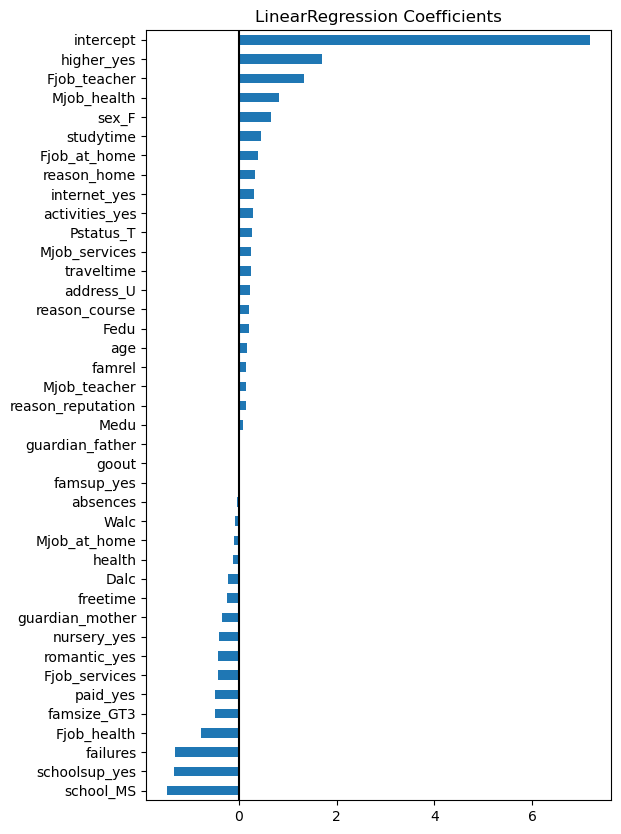

In [98]:
## Plot the coefficients
ax = coeffs.sort_values().plot(kind='barh',figsize=(6,10))
ax.axvline(0,color='k')
ax.set_title('LinearRegression Coefficients');

In [99]:
coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
coeff_rank

intercept           40.00
higher_yes          39.00
school_MS           38.00
Fjob_teacher        37.00
schoolsup_yes       36.00
failures            35.00
Mjob_health         34.00
Fjob_health         33.00
sex_F               32.00
famsize_GT3         31.00
paid_yes            30.00
studytime           29.00
Fjob_services       28.00
romantic_yes        27.00
nursery_yes         26.00
Fjob_at_home        25.00
guardian_mother     24.00
reason_home         23.00
internet_yes        22.00
activities_yes      21.00
Pstatus_T           20.00
Mjob_services       19.00
traveltime          18.00
freetime            17.00
address_U           16.00
reason_course       15.00
Fedu                14.00
Dalc                13.00
age                 12.00
famrel              11.00
Mjob_teacher        10.00
reason_reputation    9.00
health               8.00
Mjob_at_home         7.00
Medu                 6.00
Walc                 5.00
guardian_father      4.00
absences             3.00
famsup_yes  

In [100]:
top_n_features = coeff_rank.head(10)
top_n_features

intercept       40.00
higher_yes      39.00
school_MS       38.00
Fjob_teacher    37.00
schoolsup_yes   36.00
failures        35.00
Mjob_health     34.00
Fjob_health     33.00
sex_F           32.00
famsize_GT3     31.00
dtype: float64

In [101]:
 ## Slicing out the top_n_features names to visualize
plot_vals = coeffs.loc[top_n_features.index]
plot_vals

intercept        7.18
higher_yes       1.69
school_MS       -1.46
Fjob_teacher     1.33
schoolsup_yes   -1.31
failures        -1.29
Mjob_health      0.82
Fjob_health     -0.77
sex_F            0.66
famsize_GT3     -0.49
dtype: float64

In [102]:
top_n = 15
coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
top_n_features = coeff_rank.head(top_n).index
plot_vals = coeffs.loc[top_n_features].sort_values()
plot_vals

school_MS       -1.46
schoolsup_yes   -1.31
failures        -1.29
Fjob_health     -0.77
famsize_GT3     -0.49
paid_yes        -0.48
Fjob_services   -0.42
romantic_yes    -0.42
nursery_yes     -0.40
studytime        0.46
sex_F            0.66
Mjob_health      0.82
Fjob_teacher     1.33
higher_yes       1.69
intercept        7.18
dtype: float64

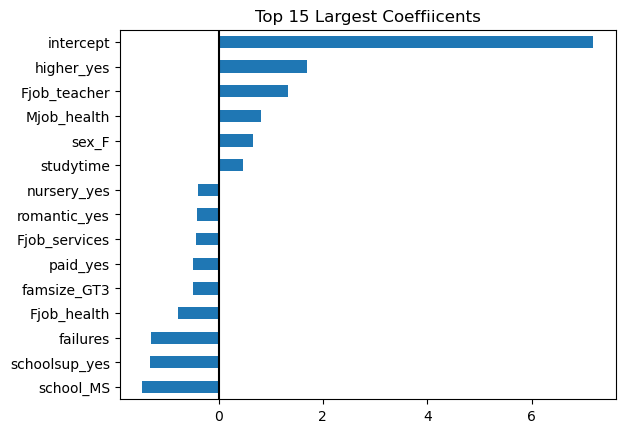

In [103]:
## Plot the coefficients
ax = plot_vals.sort_values().plot(kind='barh')#,figsize=(5,6))
ax.axvline(0,color='k')
ax.set_title(f'Top {top_n} Largest Coeffiicents');

In [104]:
def plot_coeffs(coeffs, top_n=None,  figsize=(4,5), intercept=False):
    if (intercept==False) & ('intercept' in coeffs.index):
        coeffs = coeffs.drop('intercept')
        
    if top_n==None:
        ## sort all features and set title
        plot_vals = coeffs#.sort_values()
        title = "All Coefficients - Ranked by Magnitude"
    else:
        ## rank the coeffs and select the top_n
        coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
        top_n_features = coeff_rank.head(top_n)
        plot_vals = coeffs.loc[top_n_features.index].sort_values()
        ## sort features and keep top_n and set title
        title = f"Top {top_n} Largest Coefficients"
        
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Coefficient', 
           ylabel='Feature Names', 
           title=title)
    ax.axvline(0, color='k')
    
    ## return ax in case want to continue to update/modify figure
    return ax

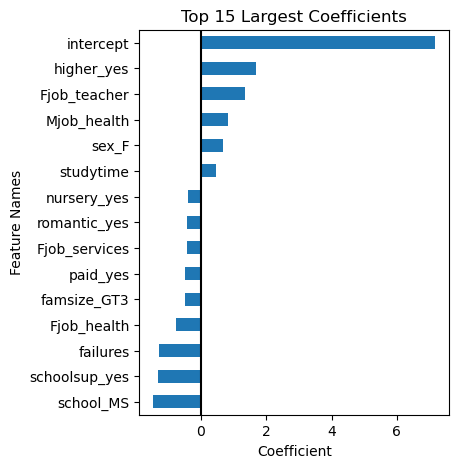

In [105]:
## Testing our function with intercept=True
ax= plot_coeffs(coeffs,top_n=15, intercept=True)

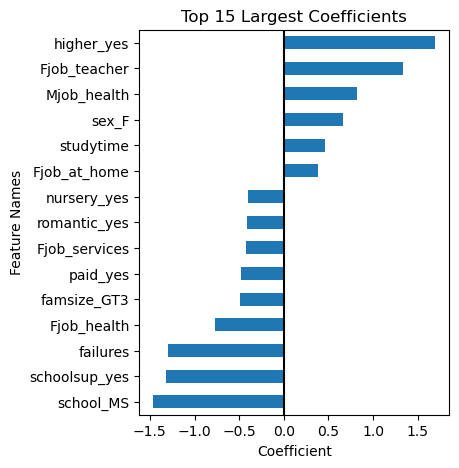

In [106]:
## Testing our function with intercept=False (the default)
ax= plot_coeffs(coeffs,top_n=15)

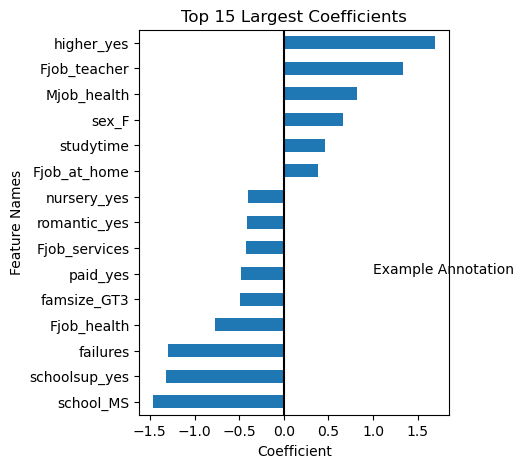

In [107]:
ax= plot_coeffs(coeffs,top_n=15)
ax.annotate("Example Annotation", xy=(1,5),);

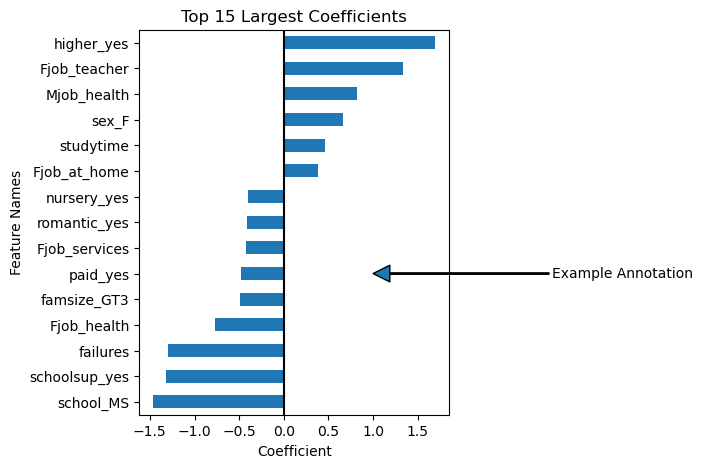

In [108]:
ax= plot_coeffs(coeffs,top_n=15)
ax.annotate("Example Annotation", xy=(1,5),xytext=(3,5),va='center',
            arrowprops={'width':1,'ec':'k'});

In [109]:
print(type(ax.patches))
print(len(ax.patches))
ax.patches[0]

<class 'matplotlib.axes._base._AxesBase.ArtistList'>
15


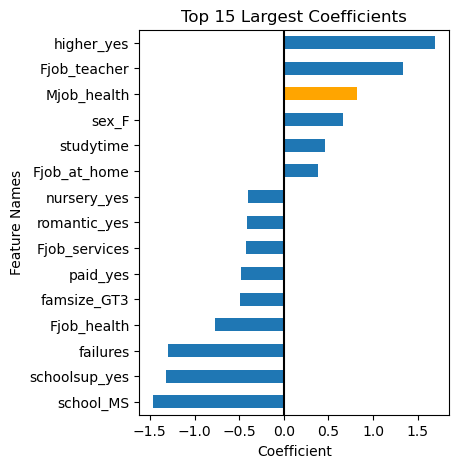

In [110]:
ax= plot_coeffs(coeffs,top_n=15)
## slicing out a test bar and changing its color to identify index
bar = ax.patches[12]
bar.set_facecolor('orange')

In [111]:
## get height returns the width of the bar for barh
bar.get_height()

0.5

In [112]:
## get width returns the height of the bar (the coefficient to annotate)
bar.get_width()

0.8217673285285543

In [113]:
## get_x will return top-left coordinate of bar (which is at x=0)
bar.get_x()

0

In [114]:
## returns the bottom coordinate of the bar
bar.get_y()

11.75

In [115]:
## calculate center of bar
bar_ax = bar.get_y() + bar.get_height()/2
bar_ax

12.0

In [116]:
## get the value to annotate
val = bar.get_width()
val

0.8217673285285543

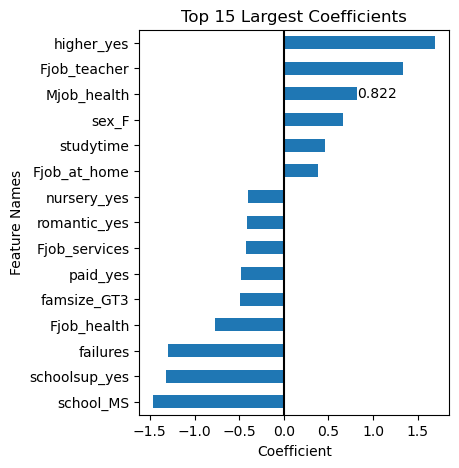

In [118]:
ax= plot_coeffs(coeffs,top_n=15)
## slicing out a test bar and changing its color to identify index
bar = ax.patches[12]
## calculate center of bar
bar_ax = bar.get_y() + bar.get_height()/2
## get the value to annotate
val = bar.get_width()
# ha and va stand for the horizontal and vertical alignment
ax.annotate(f"{val:.3f}",
                 (val,bar_ax), ha='left', va='center', size=10) ;

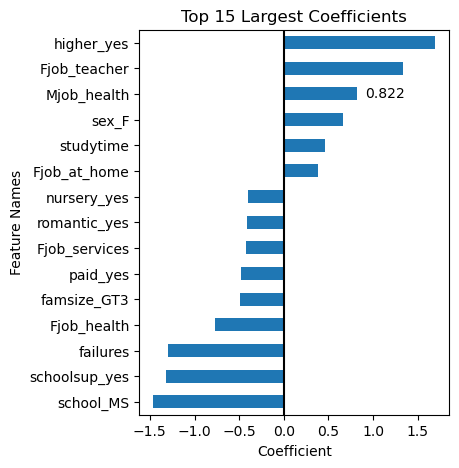

In [119]:
ax= plot_coeffs(coeffs,top_n=15)
## slicing out a test bar and changing its color to identify index
bar = ax.patches[12]
## calculate center of bar
bar_ax = bar.get_y() + bar.get_height()/2
## get the value to annotate
val = bar.get_width()
# ha and va stand for the horizontal and vertical alignment
ax.annotate(f"{val:.3f}",
                 (val,bar_ax), ha='left', va='center', size=10,
           xytext=(6,0), textcoords='offset points') ;

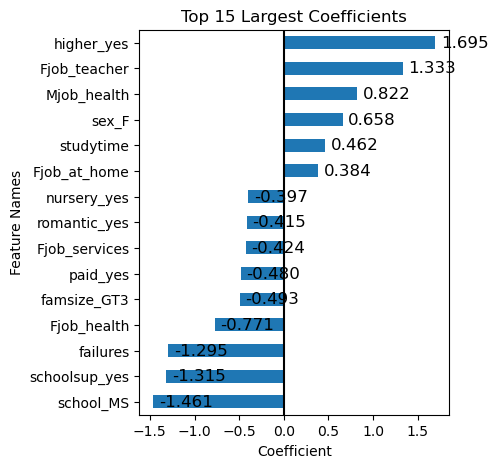

In [120]:
ax= plot_coeffs(coeffs,top_n=15)
for bar in ax.patches:
    ## calculate center of bar
    bar_ax = bar.get_y() + bar.get_height()/2
    ## get the value to annotate
    val = bar.get_width()
    # ha and va stand for the horizontal and vertical alignment
    ax.annotate(f"{val:.3f}", (val,bar_ax),
                ha='left',va='center',size=12,
                xytext=(4,0), textcoords='offset points') 

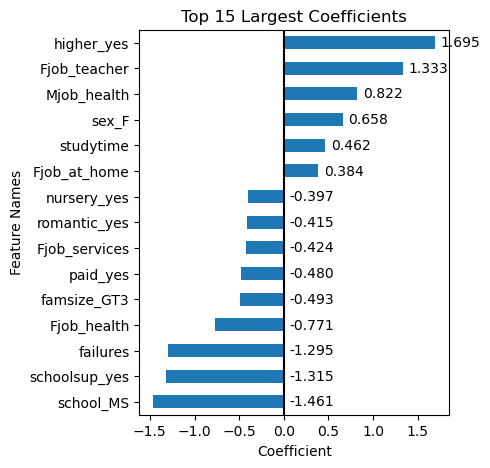

In [121]:
ax= plot_coeffs(coeffs,top_n=15)
for bar in ax.patches:
    ## calculate center of bar
    bar_ax = bar.get_y() + bar.get_height()/2
    ## get the value to annotate
    val = bar.get_width()
    
    if val < 0:
        val_pos = 0
    else:
        val_pos = val
    
    # ha and va stand for the horizontal and vertical alignment
    ax.annotate(f"{val:.3f}", (val_pos,bar_ax),
                ha='left',va='center',size=10,
                xytext=(4,0), textcoords='offset points')

In [122]:
def annotate_hbars(ax, ha='left',va='center',size=12,  xytext=(4,0),
                  textcoords='offset points'):
    for bar in ax.patches:
    
        ## calculate center of bar
        bar_ax = bar.get_y() + bar.get_height()/2
        ## get the value to annotate
        val = bar.get_width()
        if val < 0:
            val_pos = 0
        else:
            val_pos = val
        # ha and va stand for the horizontal and vertical alignment
        ax.annotate(f"{val:.3f}", (val_pos,bar_ax), ha=ha,va=va,size=size,
                        xytext=xytext, textcoords=textcoords)

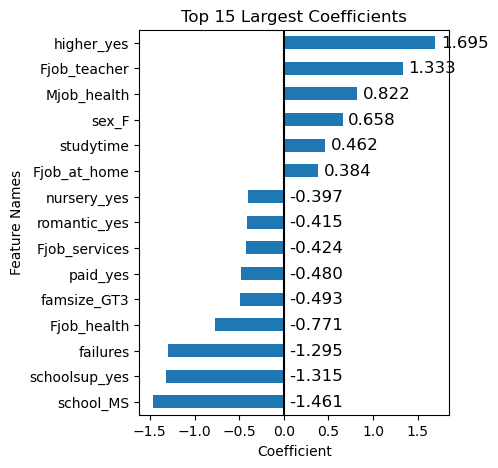

In [123]:
ax = plot_coeffs(coeffs,top_n=15)
annotate_hbars(ax)

In [124]:
def plot_coeffs(coeffs, top_n=None,  figsize=(4,5), 
                intercept=False,  intercept_name = "intercept", 
                annotate=False, ha='left',va='center', size=12, 
                xytext=(4,0), textcoords='offset points'):
    """ Plots the top_n coefficients from a Series, with optional annotations.
    """
    # Drop intercept if intercept=False and 
    if (intercept==False) & ( intercept_name in coeffs.index):
        coeffs = coeffs.drop(intercept_name)
    if top_n==None:
        ## sort all features and set title
        plot_vals = coeffs#.sort_values()
        title = "All Coefficients - Ranked by Magnitude"
    else:
        ## rank the coeffs and select the top_n
        coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
        top_n_features = coeff_rank.head(top_n)
        
        ## sort features and keep top_n and set title
        plot_vals = coeffs.loc[top_n_features.index].sort_values()
        title = f"Top {top_n} Largest Coefficients"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Coefficient', 
            ylabel='Feature Names', 
            title=title)
    ax.axvline(0, color='k')
    if annotate==True:
        annotate_hbars(ax, ha=ha,va=va,size=size,xytext=xytext, textcoords=textcoords)
    return ax

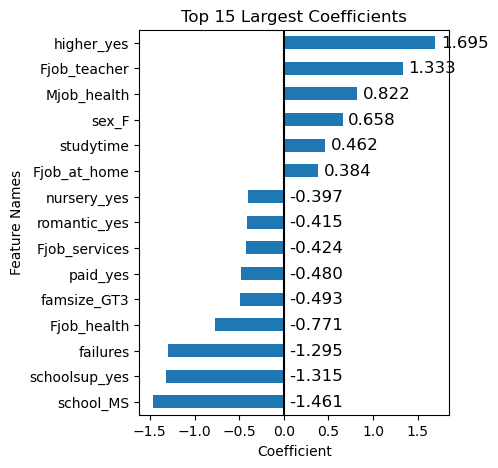

In [125]:
plot_coeffs(coeffs, top_n=15, annotate=True);

## Interpreting Coefficients - Linear Regression

### Reminder: Interpreting Coefficients
When interpreting coefficients we need to keep in mind what transformations have been applied to our features.

If its a numeric feature and it has NOT been scaled:
The coefficient tells us "when I increase the value for this feature by 1 unit, this is the change in the target."
If its a numeric feature that has been scaled using Z-scores/StandardScaler:
The coefficient tells us "when I increase the value for this feature by 1 Standard Deviation this is the change in the target."
If its a One-Hot Encoded categorical feature:
The coefficient tells us "if you belong to this category, this will be the change in the target."


Training Data:	R^2= 0.35	RMSE= 2.65
Test Data:	R^2= 0.35	RMSE= 2.45


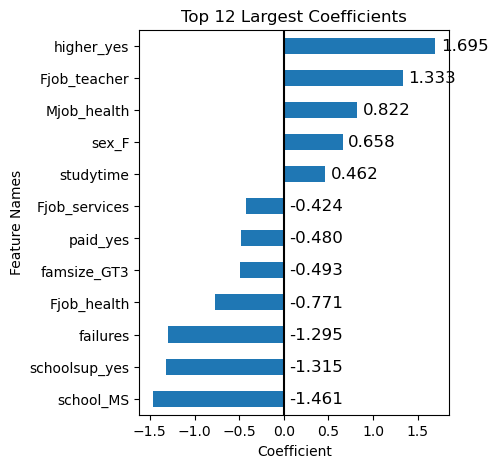

In [126]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_df,y_train)
evaluate_regression(lin_reg, X_train_df, y_train, X_test_df,y_test)
coeffs = get_coeffs_linreg(lin_reg)
plot_coeffs(coeffs,top_n=12,annotate=True);


Interpreting Our Model's Coefficients


Intercept:
Our model assumed a baseline score of 7.176
Coefficients that Positively Influence Final Grade:
higher_yes (student intends to continue higher education):
Being in the yes group (wanting higher education) increases their grade by 1.695 (out of 20).
Fjob_teacher (father is an educator):
Having a father who is a teacher increases their grade by 1.33.
Mjob_health:
Having a mother who works in healthcare increases the predicted grade by 0.8.
sex_F:
Being female increases the predicted grade by 0.65.
studytime:
Increasing studytime hours by 1 (according to the ordinal scale) increases the predicted grade by 0.46.
studytime (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours).
Coefficients that Negatively Influence Final Grade:
school_MS:
Attending MS subtracted 1.461 points.
schoolsup_yes (getting extra education support):
student getting extra support decreases the predicted score by 1.3. While this may seem paradoxical at first (why would a student with MORE help perform worse?), but this could represent the effect of the student needing the extra help in the first place.
failures:
for every 1 failure, the predicted score decreases by 1.295.
Fjob_health:
Interestingly, as opposed to having a Mother in healthcare, having a father in healthcare decreases the predicted grade by .771.
famesize_GT3:
Having a larger family (more than 3) decreases the predicted grade by .493.

## Saving & Loading Models (joblib)


In [127]:
## Fitting and evaluating the model
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train_df, y_train)
evaluate_regression(rf_reg, X_train_df, y_train, X_test_df, y_test)

Training Data:	R^2= 0.90	RMSE= 1.05
Test Data:	R^2= 0.34	RMSE= 2.46


In [128]:
## saving variables for next lesson/notebook
import joblib
## creating a dictionary of all of the variables to save for later
export = {'X_train':X_train_df,
         'y_train': y_train,
         'X_test':X_test_df,
          "y_test": y_test,
         'preprocessor':preprocessor,
         'RandomForest':rf_reg}
joblib.dump(export, 'random_forest_l01.joblib')

['random_forest_l01.joblib']

In [129]:
import joblib
loaded = joblib.load('random_forest_l01.joblib')
loaded.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'RandomForest'])

In [130]:
X_train_df = loaded['X_train']
y_train = loaded['y_train']
X_test_df = loaded['X_test']
y_test = loaded['y_test']
preprocessor = loaded['preprocessor']
loaded_model = loaded['RandomForest']

Training Data:	R^2= 0.90	RMSE= 1.05
Test Data:	R^2= 0.34	RMSE= 2.46


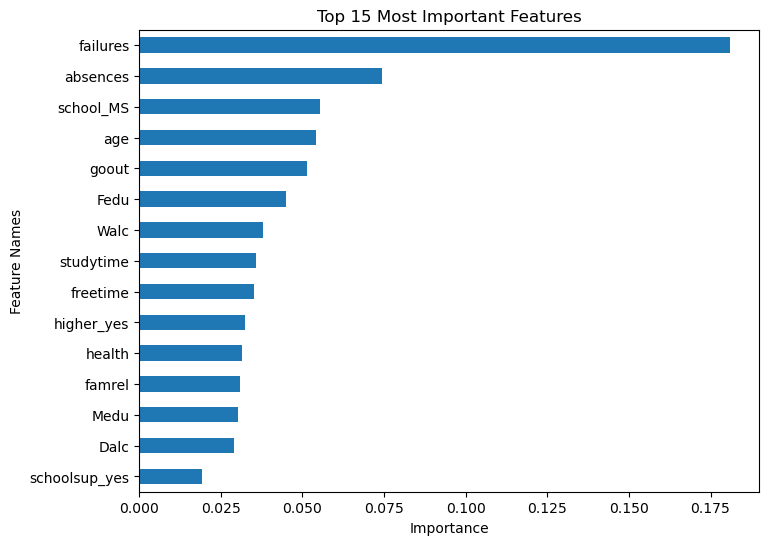

In [131]:
evaluate_regression(loaded_model,X_train_df, y_train, X_test_df,y_test)
loaded_importances = get_importances(loaded_model)
plot_importance_color(loaded_importances,top_n=15,color_dict=None);